In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners = []
notusing =[
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.1,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    #herding_behavior_mean = 0.7,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.5, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
#    spreading_rate = normal_ci(0.5, 1.5, 20)
    restaurant_count_per_work_district = 10, #100
    hoprank_infected_sample_ratio =1.0
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)
run_prefix = "hopranks/HHHRNL-a-"

params = copy.deepcopy(common_parameters)

Save these seeds if you want to rerun a scenario
[9802]
log initialized
Average similarity between family members is 0.9882847155788448 at temperature -1
Average similarity between family and home is 0.9998989069616987 at temperature -1
Average similarity between students and their classroom is 0.778960870657593 at temperature -1
Average classroom occupancy is 12.791666666666666 and number classrooms is 24
Average similarity between workers is 0.9991530037004132 at temperature -1
Average office occupancy is 10.09375 and number offices is 64
Average friend similarity for adults: 0.9990056231213587 for kids: 0.8394340737531829
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 

avg restaurant similarity 0.4373704852178554
disconnects
0.07
clumpiness 26.82
maxlen 54
avg restaurant similarity 0.534547708007831
disconnects
0.09
clumpiness 22.69
maxlen 32
avg restaurant similarity 0.449163454685372
disconnects
0.12
clumpiness 28.07
maxlen 46
avg restaurant similarity 0.5418202849036805
disconnects
0.15
clumpiness 26.54
maxlen 37
avg restaurant similarity 0.6691726127472183
disconnects
0.09
clumpiness 24.31
maxlen 40
avg restaurant similarity 0.5530350945386053
disconnects
0.06
clumpiness 23.39
maxlen 45
avg restaurant similarity 0.5684544399151509
disconnects
0.75
clumpiness 63.93
maxlen 27
avg restaurant similarity 0.4116310611365532
disconnects
0.05
clumpiness 24.54
maxlen 39
avg restaurant similarity 0.530338413001667
disconnects
0.07
clumpiness 22.51
maxlen 36
avg restaurant similarity 0.6076897881556729
disconnects
0.13
clumpiness 26.76
maxlen 39
avg restaurant similarity 0.5215238165484349
disconnects
0.09
clumpiness 25.57
maxlen 45
avg restaurant similarit

disconnects
0.13
clumpiness 25.25
maxlen 33
avg restaurant similarity 0.4914226158646971
disconnects
0.16
clumpiness 28.0
maxlen 33
avg restaurant similarity 0.5332443582228376
disconnects
0.13
clumpiness 29.26
maxlen 48
avg restaurant similarity 0.540130804836962
disconnects
0.1
clumpiness 25.05
maxlen 41
avg restaurant similarity 0.5417541774264159
disconnects
0.05
clumpiness 21.33
maxlen 44
avg restaurant similarity 0.6362269822896752
disconnects
0.94
clumpiness 75.72
maxlen 15
avg restaurant similarity 0.6627651169448749
disconnects
0.11
clumpiness 25.08
maxlen 36
avg restaurant similarity 0.6512491618988434
disconnects
0.09
clumpiness 24.24
maxlen 44
avg restaurant similarity 0.6196742939357202
disconnects
0.08
clumpiness 23.13
maxlen 39
avg restaurant similarity 0.686691762668725
disconnects
0.08
clumpiness 21.64
maxlen 36
avg restaurant similarity 0.539213176092929
disconnects
0.1
clumpiness 24.85
maxlen 39
avg restaurant similarity 0.3797259137825745
disconnects
0.1
clumpiness 

avg restaurant similarity 0.5386151250234562
disconnects
0.06
clumpiness 24.72
maxlen 48
avg restaurant similarity 0.5727157026714987
disconnects
0.07
clumpiness 20.25
maxlen 29
avg restaurant similarity 0.5338044555636965
disconnects
0.09
clumpiness 27.36
maxlen 48
avg restaurant similarity 0.41072411674375914
disconnects
0.82
clumpiness 67.53
maxlen 19
avg restaurant similarity 0.5699968328657424
disconnects
0.08
clumpiness 20.69
maxlen 34
avg restaurant similarity 0.4108896090747916
disconnects
0.08
clumpiness 24.98
maxlen 44
avg restaurant similarity 0.6733185505157044
disconnects
0.11
clumpiness 24.71
maxlen 38
avg restaurant similarity 0.6709727744870805
disconnects
0.09
clumpiness 21.83
maxlen 37
avg restaurant similarity 0.428408760612412
disconnects
0.08
clumpiness 29.07
maxlen 48
avg restaurant similarity 0.5174159126573852
disconnects
0.15
clumpiness 25.68
maxlen 33
avg restaurant similarity 0.7287306310810434
disconnects
0.9
clumpiness 72.76
maxlen 27
avg restaurant similar

disconnects
0.09
clumpiness 23.46
maxlen 40
avg restaurant similarity 0.46044994762163666
disconnects
0.07
clumpiness 25.13
maxlen 39
avg restaurant similarity 0.7299333343583276
disconnects
0.83
clumpiness 67.84
maxlen 15
avg restaurant similarity 0.6958273039582534
disconnects
0.09
clumpiness 22.77
maxlen 36
avg restaurant similarity 0.6402945264910925
disconnects
0.13
clumpiness 27.65
maxlen 40
avg restaurant similarity 0.6681978217487091
disconnects
0.11
clumpiness 24.34
maxlen 41
avg restaurant similarity 0.6171967092147326
disconnects
0.06
clumpiness 21.74
maxlen 33
avg restaurant similarity 0.624257623304298
disconnects
0.12
clumpiness 25.3
maxlen 37
avg restaurant similarity 0.6628031318184681
disconnects
0.06
clumpiness 24.4
maxlen 43
avg restaurant similarity 0.5584298616875536
disconnects
0.93
clumpiness 74.92
maxlen 15
avg restaurant similarity 0.6865880775035019
disconnects
0.08
clumpiness 24.26
maxlen 45
avg restaurant similarity 0.5569803753789444
disconnects
0.09
clumpi

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


using average of time series:
stats on susceptible:
data: [0.8241277777777777]
min:
0.8241277777777777
max:
0.8241277777777777
std:
0.0
mean:
0.8241277777777777
median:
0.8241277777777777
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on infected:
data: [0.014150000000000001]
min:
0.014150000000000001
max:
0.014150000000000001
std:
0.0
mean:
0.014150000000000001
median:
0.014150000000000001
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on recovered:
data: [0.14414166666666667]
min:
0.14414166666666667
max:
0.14414166666666667
std:
0.0
mean:
0.14414166666666667
median:
0.14414166666666667
95% confidence interval for the mean:
(nan,nan)
using average of time series:
stats on hospitalization:
data: [0.002163888888888889]
min:
0.002163888888888889
max:
0.002163888888888889
std:
0.0
mean:
0.002163888888888889
median:
0.002163888888888889
95% confidence interval for the mean:
(nan,nan)
using average of time series:
st

(<function dict.items>, <function dict.items>, <function dict.items>)

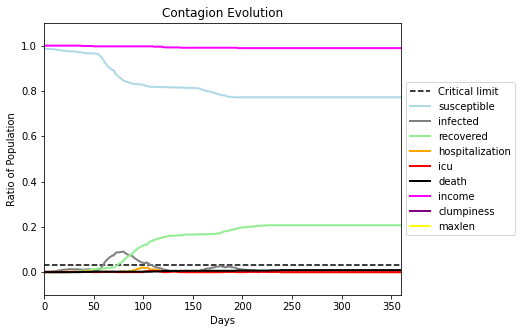

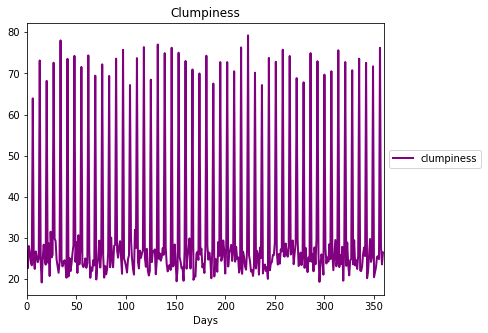

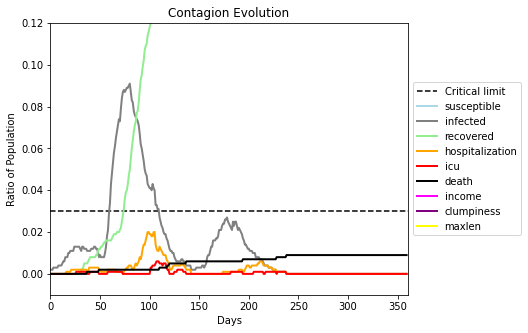

In [4]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[921]
Average similarity between family members is 0.9927732846097307 at temperature -0.999
Average similarity between family and home is 0.9998917746513742 at temperature -1
Average similarity between students and their classroom is 0.7252651257189556 at temperature -0.999
Average classroom occupancy is 12.416666666666666 and number classrooms is 24
Average similarity between workers is 0.978089624619091 at temperature -0.999
Average office occupancy is 10.516129032258064 and number offices is 62
Average friend similarity for adults: 0.9970637331389898 for kids: 0.86516434268138
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total 

avg restaurant similarity 0.6169321510898277
disconnects
0.12
clumpiness 23.79
maxlen 31
avg restaurant similarity 0.7050709275960672
disconnects
0.18
clumpiness 27.78
maxlen 33
avg restaurant similarity 0.430674911047422
disconnects
0.26
clumpiness 33.05
maxlen 31
avg restaurant similarity 0.5189477042602304
disconnects
0.42
clumpiness 42.82
maxlen 34
avg restaurant similarity 0.5588912815948172
disconnects
0.22
clumpiness 30.1
maxlen 30
avg restaurant similarity 0.486722345955
disconnects
0.25
clumpiness 31.21
maxlen 29
avg restaurant similarity 0.47699306611493764
disconnects
0.83
clumpiness 67.94
maxlen 18
avg restaurant similarity 0.5469678460877332
disconnects
0.25
clumpiness 33.04
maxlen 37
avg restaurant similarity 0.5951661012890143
disconnects
0.19
clumpiness 28.49
maxlen 31
avg restaurant similarity 0.5532377164799881
disconnects
0.27
clumpiness 34.54
maxlen 38
avg restaurant similarity 0.5356949283729194
disconnects
0.22
clumpiness 30.76
maxlen 36
avg restaurant similarity 

disconnects
0.44
clumpiness 43.61
maxlen 27
avg restaurant similarity 0.7455619943839423
disconnects
0.23
clumpiness 30.15
maxlen 28
avg restaurant similarity 0.8366760354929934
disconnects
0.26
clumpiness 33.37
maxlen 35
avg restaurant similarity 0.6876738742895107
disconnects
0.43
clumpiness 43.1
maxlen 32
avg restaurant similarity 0.4347906749369897
disconnects
0.26
clumpiness 32.55
maxlen 31
avg restaurant similarity 0.7207416465800883
disconnects
0.91
clumpiness 73.56
maxlen 15
avg restaurant similarity 0.7353104064988397
disconnects
0.5
clumpiness 48.88
maxlen 32
avg restaurant similarity 0.7148850219171218
disconnects
0.34
clumpiness 39.46
maxlen 33
avg restaurant similarity 0.7334684995558589
disconnects
0.21
clumpiness 28.61
maxlen 34
avg restaurant similarity 0.6464281101309098
disconnects
0.24
clumpiness 32.94
maxlen 34
avg restaurant similarity 0.7000860216442611
disconnects
0.36
clumpiness 39.79
maxlen 34
avg restaurant similarity 0.7169543440664863
disconnects
0.33
clumpi

avg restaurant similarity 0.6172407680556723
disconnects
0.25
clumpiness 34.68
maxlen 39
avg restaurant similarity 0.6243616903558167
disconnects
0.3
clumpiness 36.2
maxlen 38
avg restaurant similarity 0.7857145750273123
disconnects
0.22
clumpiness 31.18
maxlen 44
avg restaurant similarity 0.8013871492086547
disconnects
0.83
clumpiness 67.99
maxlen 14
avg restaurant similarity 0.5892818550398042
disconnects
0.3
clumpiness 35.18
maxlen 32
avg restaurant similarity 0.5316735216747324
disconnects
0.27
clumpiness 34.67
maxlen 36
avg restaurant similarity 0.7300267382724349
disconnects
0.3
clumpiness 36.31
maxlen 30
avg restaurant similarity 0.801709232691558
disconnects
0.31
clumpiness 36.49
maxlen 32
avg restaurant similarity 0.5889563792275258
disconnects
0.16
clumpiness 26.04
maxlen 34
avg restaurant similarity 0.8723550549613465
disconnects
0.4
clumpiness 40.41
maxlen 31
avg restaurant similarity 0.6761677233259056
disconnects
0.89
clumpiness 72.27
maxlen 24
avg restaurant similarity 0

disconnects
0.22
clumpiness 29.74
maxlen 31
avg restaurant similarity 0.5983813557208042
disconnects
0.24
clumpiness 31.36
maxlen 34
avg restaurant similarity 0.5862600593234863
disconnects
0.78
clumpiness 66.22
maxlen 35
avg restaurant similarity 0.5038158958741811
disconnects
0.3
clumpiness 35.1
maxlen 32
avg restaurant similarity 0.7972887296195156
disconnects
0.46
clumpiness 44.38
maxlen 27
avg restaurant similarity 0.5933388941510559
disconnects
0.26
clumpiness 33.3
maxlen 31
avg restaurant similarity 0.547109877026365
disconnects
0.26
clumpiness 33.08
maxlen 31
avg restaurant similarity 0.7405617617798472
disconnects
0.32
clumpiness 37.17
maxlen 34
avg restaurant similarity 0.795446189169263
disconnects
0.19
clumpiness 30.7
maxlen 43
avg restaurant similarity 0.6599000979324864
disconnects
0.86
clumpiness 70.38
maxlen 30
avg restaurant similarity 0.5471361408492595
disconnects
0.29
clumpiness 35.61
maxlen 35
avg restaurant similarity 0.472333329116729
disconnects
0.32
clumpiness 

9

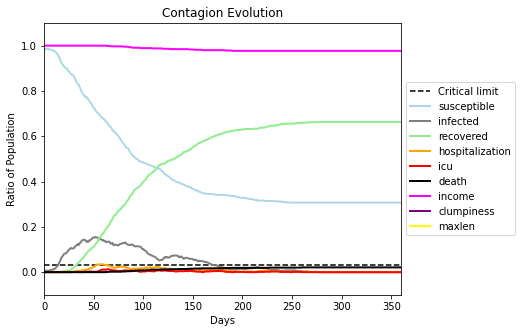

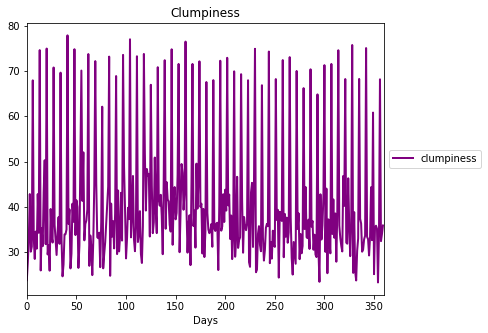

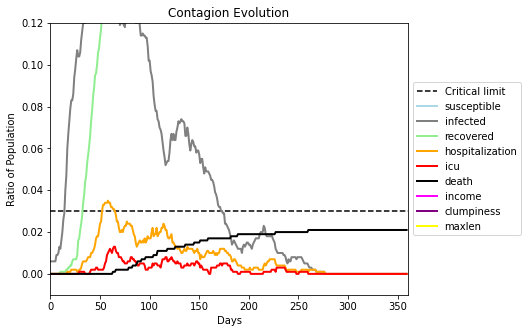

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.999", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )
9

Save these seeds if you want to rerun a scenario
[5572]
Average similarity between family members is 0.9909367507331562 at temperature -0.998
Average similarity between family and home is 0.9999074625563311 at temperature -1
Average similarity between students and their classroom is 0.7687807822984088 at temperature -0.998
Average classroom occupancy is 12.833333333333334 and number classrooms is 24
Average similarity between workers is 0.9984924395668164 at temperature -0.998
Average office occupancy is 10.412698412698413 and number offices is 63
Average friend similarity for adults: 0.9990860778304007 for kids: 0.8823549254219963
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 7 people.
Total of 7 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 1 people.
To

avg restaurant similarity 0.5606414131124414
disconnects
0.0
clumpiness 15.96
maxlen 34
avg restaurant similarity 0.5748899770350334
disconnects
0.0
clumpiness 16.55
maxlen 29
avg restaurant similarity 0.5737188593222959
disconnects
0.0
clumpiness 16.74
maxlen 33
avg restaurant similarity 0.4730664357010751
disconnects
0.0
clumpiness 16.02
maxlen 30
avg restaurant similarity 0.5329272581227958
disconnects
0.0
clumpiness 16.17
maxlen 35
avg restaurant similarity 0.5244183225685544
disconnects
0.02
clumpiness 19.67
maxlen 35
avg restaurant similarity 0.582047002463313
disconnects
0.53
clumpiness 50.58
maxlen 33
avg restaurant similarity 0.5157314440495312
disconnects
0.0
clumpiness 17.62
maxlen 32
avg restaurant similarity 0.5185261924308551
disconnects
0.0
clumpiness 16.64
maxlen 38
avg restaurant similarity 0.5174601331327461
disconnects
0.01
clumpiness 17.04
maxlen 33
avg restaurant similarity 0.4463666608039206
disconnects
0.01
clumpiness 16.09
maxlen 28
avg restaurant similarity 0.4

avg restaurant similarity 0.428532220488113
disconnects
0.01
clumpiness 19.48
maxlen 35
avg restaurant similarity 0.5155667004459105
disconnects
0.01
clumpiness 18.13
maxlen 36
avg restaurant similarity 0.515858077541232
disconnects
0.0
clumpiness 14.69
maxlen 31
avg restaurant similarity 0.571312604276899
disconnects
0.0
clumpiness 18.44
maxlen 37
avg restaurant similarity 0.542272784909135
disconnects
0.84
clumpiness 69.49
maxlen 27
avg restaurant similarity 0.5621175492765835
disconnects
0.0
clumpiness 16.64
maxlen 29
avg restaurant similarity 0.6029826359154964
disconnects
0.01
clumpiness 17.22
maxlen 29
avg restaurant similarity 0.6254917403612987
disconnects
0.0
clumpiness 17.29
maxlen 36
avg restaurant similarity 0.5529761101221637
disconnects
0.02
clumpiness 22.05
maxlen 37
avg restaurant similarity 0.5876319984614204
disconnects
0.01
clumpiness 16.09
maxlen 27
avg restaurant similarity 0.585539976171601
disconnects
0.0
clumpiness 16.0
maxlen 31
avg restaurant similarity 0.6956

avg restaurant similarity 0.5242733301445572
disconnects
0.0
clumpiness 18.79
maxlen 36
avg restaurant similarity 0.49757219827839333
disconnects
0.0
clumpiness 18.9
maxlen 38
avg restaurant similarity 0.6542044423065125
disconnects
0.47
clumpiness 48.1
maxlen 42
avg restaurant similarity 0.5368951903148345
disconnects
0.02
clumpiness 21.02
maxlen 40
avg restaurant similarity 0.6420459676839891
disconnects
0.01
clumpiness 20.43
maxlen 44
avg restaurant similarity 0.553276958318622
disconnects
0.0
clumpiness 26.76
maxlen 52
avg restaurant similarity 0.6016884616849718
disconnects
0.02
clumpiness 28.41
maxlen 55
avg restaurant similarity 0.5248664051735451
disconnects
0.0
clumpiness 27.42
maxlen 57
avg restaurant similarity 0.5492730123793766
disconnects
0.01
clumpiness 18.84
maxlen 39
avg restaurant similarity 0.6472307286303447
disconnects
0.61
clumpiness 55.4
maxlen 31
avg restaurant similarity 0.6481628988414656
disconnects
0.0
clumpiness 17.96
maxlen 38
avg restaurant similarity 0.5

avg restaurant similarity 0.636712310073156
disconnects
0.7
clumpiness 59.67
maxlen 26
avg restaurant similarity 0.43735328414819735
disconnects
0.01
clumpiness 21.23
maxlen 43
avg restaurant similarity 0.4612297730756284
disconnects
0.01
clumpiness 18.33
maxlen 37
avg restaurant similarity 0.5871074152854238
disconnects
0.03
clumpiness 21.67
maxlen 43
avg restaurant similarity 0.6144463485736525
disconnects
0.0
clumpiness 16.97
maxlen 33
avg restaurant similarity 0.5500156902250256
disconnects
0.01
clumpiness 17.97
maxlen 34
avg restaurant similarity 0.5092568925712417
disconnects
0.01
clumpiness 16.95
maxlen 29
avg restaurant similarity 0.5819628226955806
disconnects
0.48
clumpiness 48.17
maxlen 37
avg restaurant similarity 0.6110270132265233
disconnects
0.03
clumpiness 22.13
maxlen 35
avg restaurant similarity 0.5585105804672931
disconnects
0.0
clumpiness 16.05
maxlen 32
avg restaurant similarity 0.472796061125034
disconnects
0.01
clumpiness 21.34
maxlen 45
avg restaurant similarity

(<function dict.items>, <function dict.items>, <function dict.items>)

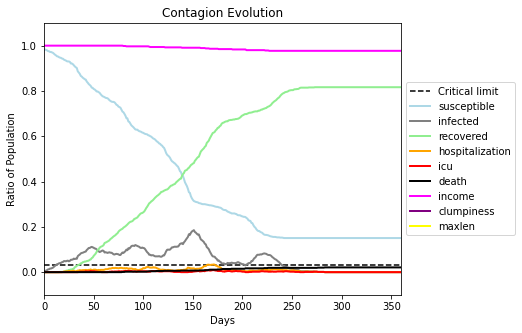

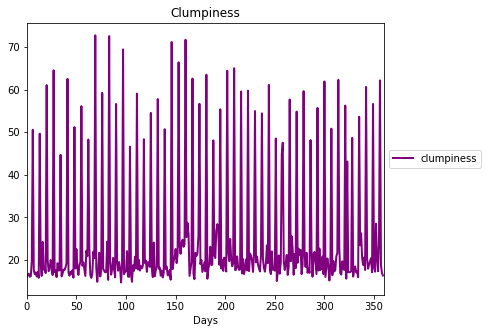

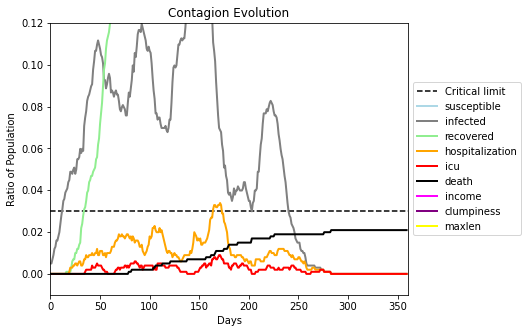

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.998
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.998", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[635]
Average similarity between family members is 0.9923780237846107 at temperature -0.9975
Average similarity between family and home is 0.999894213266472 at temperature -1
Average similarity between students and their classroom is 0.7255034650961226 at temperature -0.9975
Average classroom occupancy is 11.91304347826087 and number classrooms is 23
Average similarity between workers is 0.9817487694975838 at temperature -0.9975
Average office occupancy is 10.046153846153846 and number offices is 65
Average friend similarity for adults: 0.9936551794134304 for kids: 0.7778382004668504
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
To

avg restaurant similarity 0.47169087946747595
disconnects
0.11
clumpiness 22.18
maxlen 33
avg restaurant similarity 0.6580639732624775
disconnects
0.1
clumpiness 21.67
maxlen 30
avg restaurant similarity 0.48396286905976293
disconnects
0.14
clumpiness 24.64
maxlen 26
avg restaurant similarity 0.5097021222659331
disconnects
0.12
clumpiness 25.07
maxlen 42
avg restaurant similarity 0.6184181429439208
disconnects
0.09
clumpiness 19.93
maxlen 29
avg restaurant similarity 0.5977603236726883
disconnects
0.12
clumpiness 25.02
maxlen 39
avg restaurant similarity 0.5921174748261658
disconnects
0.81
clumpiness 67.28
maxlen 29
avg restaurant similarity 0.5641236438735315
disconnects
0.09
clumpiness 21.47
maxlen 29
avg restaurant similarity 0.5856409670872563
disconnects
0.13
clumpiness 23.31
maxlen 33
avg restaurant similarity 0.6255789363209342
disconnects
0.14
clumpiness 26.12
maxlen 35
avg restaurant similarity 0.4596723945052604
disconnects
0.11
clumpiness 23.43
maxlen 38
avg restaurant simil

disconnects
0.12
clumpiness 22.43
maxlen 26
avg restaurant similarity 0.5050852492921651
disconnects
0.05
clumpiness 17.99
maxlen 26
avg restaurant similarity 0.535914037194455
disconnects
0.16
clumpiness 26.87
maxlen 29
avg restaurant similarity 0.5298523766672663
disconnects
0.15
clumpiness 24.82
maxlen 34
avg restaurant similarity 0.5014445813113103
disconnects
0.17
clumpiness 28.52
maxlen 37
avg restaurant similarity 0.4436184711322133
disconnects
0.7
clumpiness 60.63
maxlen 27
avg restaurant similarity 0.477130712386426
disconnects
0.09
clumpiness 20.42
maxlen 26
avg restaurant similarity 0.5010043583240791
disconnects
0.13
clumpiness 22.97
maxlen 36
avg restaurant similarity 0.4737390234440688
disconnects
0.09
clumpiness 21.69
maxlen 27
avg restaurant similarity 0.3866650469805431
disconnects
0.11
clumpiness 22.69
maxlen 31
avg restaurant similarity 0.5840758043473984
disconnects
0.1
clumpiness 22.93
maxlen 31
avg restaurant similarity 0.5663172063677637
disconnects
0.18
clumpine

avg restaurant similarity 0.6881819632242239
disconnects
0.15
clumpiness 27.58
maxlen 45
avg restaurant similarity 0.6044654945543583
disconnects
0.14
clumpiness 24.74
maxlen 29
avg restaurant similarity 0.6461916615945841
disconnects
0.12
clumpiness 21.78
maxlen 28
avg restaurant similarity 0.5929923882891172
disconnects
0.65
clumpiness 56.61
maxlen 25
avg restaurant similarity 0.6098832149499095
disconnects
0.1
clumpiness 22.25
maxlen 30
avg restaurant similarity 0.5115345447528017
disconnects
0.12
clumpiness 24.15
maxlen 36
avg restaurant similarity 0.5631390726462459
disconnects
0.12
clumpiness 23.3
maxlen 30
avg restaurant similarity 0.6907165058279032
disconnects
0.08
clumpiness 21.86
maxlen 31
avg restaurant similarity 0.3811604537539069
disconnects
0.14
clumpiness 24.94
maxlen 29
avg restaurant similarity 0.5216228874918387
disconnects
0.19
clumpiness 27.65
maxlen 30
avg restaurant similarity 0.5560552529360796
disconnects
0.72
clumpiness 62.16
maxlen 33
avg restaurant similari

disconnects
0.13
clumpiness 23.93
maxlen 25
avg restaurant similarity 0.7338004059668065
disconnects
0.11
clumpiness 24.24
maxlen 42
avg restaurant similarity 0.6151179753143805
disconnects
0.68
clumpiness 60.41
maxlen 34
avg restaurant similarity 0.4197303685338975
disconnects
0.1
clumpiness 24.24
maxlen 36
avg restaurant similarity 0.716950777536274
disconnects
0.13
clumpiness 25.76
maxlen 38
avg restaurant similarity 0.462176832642764
disconnects
0.17
clumpiness 27.84
maxlen 34
avg restaurant similarity 0.47531367867328855
disconnects
0.19
clumpiness 28.17
maxlen 32
avg restaurant similarity 0.6183205204298372
disconnects
0.11
clumpiness 24.75
maxlen 36
avg restaurant similarity 0.6556872929203573
disconnects
0.16
clumpiness 25.32
maxlen 28
avg restaurant similarity 0.613713819423038
disconnects
0.79
clumpiness 66.05
maxlen 27
avg restaurant similarity 0.5893954786979476
disconnects
0.12
clumpiness 24.41
maxlen 37
avg restaurant similarity 0.6251756992883014
disconnects
0.09
clumpin

(<function dict.items>, <function dict.items>, <function dict.items>)

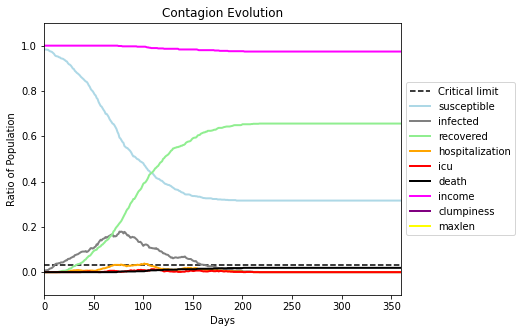

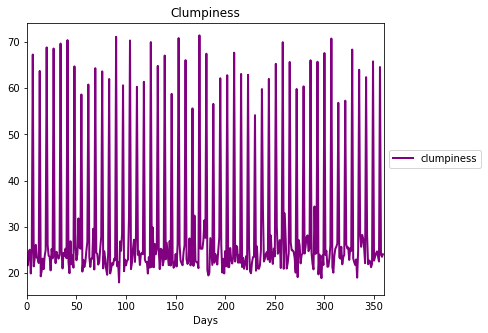

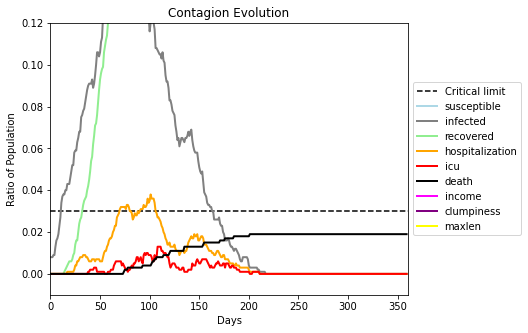

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9975
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.9975", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[4123]
Average similarity between family members is 0.9886939486663312 at temperature -0.997
Average similarity between family and home is 0.9999047009323335 at temperature -1
Average similarity between students and their classroom is 0.6889249000235469 at temperature -0.997
Average classroom occupancy is 12.541666666666666 and number classrooms is 24
Average similarity between workers is 0.9674657643517909 at temperature -0.997
Average office occupancy is 10.11111111111111 and number offices is 63
Average friend similarity for adults: 0.9948909138608151 for kids: 0.7760892113542197
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Tot

avg restaurant similarity 0.7830356139590274
disconnects
0.01
clumpiness 13.17
maxlen 21
avg restaurant similarity 0.7058442533352092
disconnects
0.0
clumpiness 12.74
maxlen 23
avg restaurant similarity 0.5607338047848117
disconnects
0.0
clumpiness 11.64
maxlen 20
avg restaurant similarity 0.6965708799742603
disconnects
0.0
clumpiness 12.31
maxlen 21
avg restaurant similarity 0.6456050056028205
disconnects
0.0
clumpiness 12.52
maxlen 21
avg restaurant similarity 0.5641270776554443
disconnects
0.0
clumpiness 13.63
maxlen 26
avg restaurant similarity 0.5771325978949999
disconnects
0.78
clumpiness 65.47
maxlen 24
avg restaurant similarity 0.6134582260237326
disconnects
0.01
clumpiness 13.65
maxlen 25
avg restaurant similarity 0.6006931749533339
disconnects
0.01
clumpiness 13.07
maxlen 24
avg restaurant similarity 0.611446723445747
disconnects
0.0
clumpiness 13.07
maxlen 21
avg restaurant similarity 0.6110479726284698
disconnects
0.0
clumpiness 12.75
maxlen 26
avg restaurant similarity 0.6

avg restaurant similarity 0.6675822914717056
disconnects
0.01
clumpiness 14.36
maxlen 26
avg restaurant similarity 0.6172856061642847
disconnects
0.0
clumpiness 13.35
maxlen 23
avg restaurant similarity 0.7544611890105002
disconnects
0.02
clumpiness 15.0
maxlen 26
avg restaurant similarity 0.6147977752827548
disconnects
0.01
clumpiness 13.7
maxlen 29
avg restaurant similarity 0.6203260994061559
disconnects
0.66
clumpiness 57.26
maxlen 21
avg restaurant similarity 0.47623200336468996
disconnects
0.0
clumpiness 14.73
maxlen 31
avg restaurant similarity 0.6054126426930173
disconnects
0.0
clumpiness 14.48
maxlen 33
avg restaurant similarity 0.5556449566659561
disconnects
0.01
clumpiness 14.5
maxlen 28
avg restaurant similarity 0.6034987169048458
disconnects
0.0
clumpiness 13.09
maxlen 23
avg restaurant similarity 0.6102170596764711
disconnects
0.0
clumpiness 12.91
maxlen 24
avg restaurant similarity 0.4789959462154608
disconnects
0.02
clumpiness 15.22
maxlen 24
avg restaurant similarity 0.

avg restaurant similarity 0.6034818386829548
disconnects
0.02
clumpiness 13.84
maxlen 22
avg restaurant similarity 0.628318624977472
disconnects
0.01
clumpiness 15.92
maxlen 29
avg restaurant similarity 0.5431936580594193
disconnects
0.71
clumpiness 60.91
maxlen 23
avg restaurant similarity 0.5221813405437181
disconnects
0.01
clumpiness 14.63
maxlen 32
avg restaurant similarity 0.7879222928363752
disconnects
0.01
clumpiness 14.67
maxlen 23
avg restaurant similarity 0.6974973557899655
disconnects
0.0
clumpiness 13.52
maxlen 24
avg restaurant similarity 0.7144735471518704
disconnects
0.0
clumpiness 13.41
maxlen 23
avg restaurant similarity 0.6156605602484722
disconnects
0.0
clumpiness 14.54
maxlen 31
avg restaurant similarity 0.7038329146522186
disconnects
0.0
clumpiness 12.74
maxlen 21
avg restaurant similarity 0.6415979393994097
disconnects
0.55
clumpiness 50.72
maxlen 25
avg restaurant similarity 0.7380359663021389
disconnects
0.0
clumpiness 13.37
maxlen 24
avg restaurant similarity 0

avg restaurant similarity 0.5487134991745399
disconnects
0.64
clumpiness 57.17
maxlen 34
avg restaurant similarity 0.6697585866130871
disconnects
0.02
clumpiness 15.84
maxlen 31
avg restaurant similarity 0.6548446147768401
disconnects
0.02
clumpiness 13.92
maxlen 21
avg restaurant similarity 0.5754180874519674
disconnects
0.02
clumpiness 14.45
maxlen 22
avg restaurant similarity 0.6340443460628997
disconnects
0.0
clumpiness 12.51
maxlen 26
avg restaurant similarity 0.5116415694136105
disconnects
0.04
clumpiness 15.35
maxlen 21
avg restaurant similarity 0.6681042524864094
disconnects
0.01
clumpiness 12.9
maxlen 23
avg restaurant similarity 0.5671483673534065
disconnects
0.67
clumpiness 58.65
maxlen 30
avg restaurant similarity 0.5809767648070494
disconnects
0.01
clumpiness 14.18
maxlen 24
avg restaurant similarity 0.6595296375745416
disconnects
0.0
clumpiness 12.3
maxlen 23
avg restaurant similarity 0.5641662102737514
disconnects
0.02
clumpiness 16.41
maxlen 31
avg restaurant similarity

(<function dict.items>, <function dict.items>, <function dict.items>)

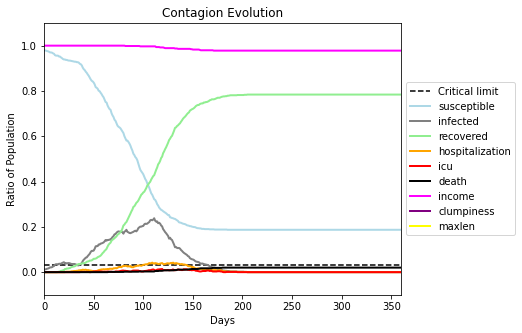

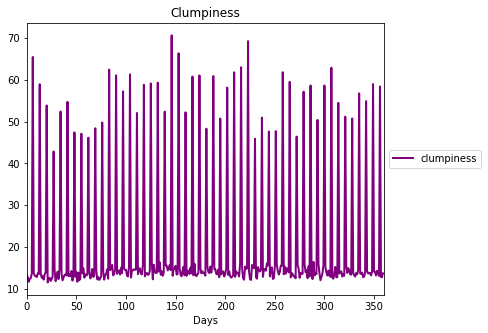

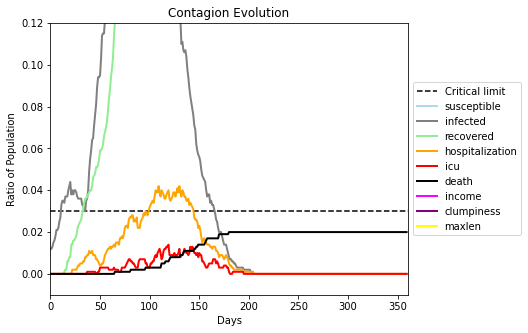

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.997
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.997", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[4525]
Average similarity between family members is 0.9887871465763234 at temperature -0.996
Average similarity between family and home is 0.9998939790028533 at temperature -1
Average similarity between students and their classroom is 0.6970103837169951 at temperature -0.996
Average classroom occupancy is 12.708333333333334 and number classrooms is 24
Average similarity between workers is 0.9888287376210575 at temperature -0.996
Average office occupancy is 10.15625 and number offices is 64
Average friend similarity for adults: 0.9946579730516428 for kids: 0.7834834015796852
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 2 allocated units with a total of 5 people.
Total of 5 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 p

avg restaurant similarity 0.5929993974431288
disconnects
0.0
clumpiness 12.68
maxlen 24
avg restaurant similarity 0.5841762343281884
disconnects
0.03
clumpiness 14.49
maxlen 25
avg restaurant similarity 0.6966248133697054
disconnects
0.02
clumpiness 14.62
maxlen 22
avg restaurant similarity 0.506403357481849
disconnects
0.04
clumpiness 15.56
maxlen 21
avg restaurant similarity 0.5495366354250527
disconnects
0.01
clumpiness 13.46
maxlen 24
avg restaurant similarity 0.5420863115750361
disconnects
0.01
clumpiness 13.41
maxlen 24
avg restaurant similarity 0.4835639394566922
disconnects
0.35
clumpiness 37.21
maxlen 29
avg restaurant similarity 0.6403374347640769
disconnects
0.0
clumpiness 12.38
maxlen 21
avg restaurant similarity 0.43458398826964373
disconnects
0.01
clumpiness 14.3
maxlen 24
avg restaurant similarity 0.5415704631521364
disconnects
0.01
clumpiness 13.03
maxlen 21
avg restaurant similarity 0.5571388047520298
disconnects
0.0
clumpiness 12.16
maxlen 23
avg restaurant similarity

avg restaurant similarity 0.662142370542444
disconnects
0.0
clumpiness 12.51
maxlen 25
avg restaurant similarity 0.5644684174546795
disconnects
0.0
clumpiness 14.18
maxlen 23
avg restaurant similarity 0.5405538957785564
disconnects
0.01
clumpiness 14.25
maxlen 28
avg restaurant similarity 0.5877445268657847
disconnects
0.0
clumpiness 12.42
maxlen 23
avg restaurant similarity 0.5279388852110344
disconnects
0.49
clumpiness 46.61
maxlen 24
avg restaurant similarity 0.4762632815831197
disconnects
0.01
clumpiness 13.71
maxlen 24
avg restaurant similarity 0.5714908761519306
disconnects
0.01
clumpiness 13.8
maxlen 24
avg restaurant similarity 0.5661178367426993
disconnects
0.0
clumpiness 12.32
maxlen 23
avg restaurant similarity 0.536797934405428
disconnects
0.0
clumpiness 12.93
maxlen 21
avg restaurant similarity 0.6421176499233623
disconnects
0.01
clumpiness 13.49
maxlen 27
avg restaurant similarity 0.4914162960603719
disconnects
0.02
clumpiness 14.11
maxlen 22
avg restaurant similarity 0.6

avg restaurant similarity 0.5407788423082989
disconnects
0.01
clumpiness 13.13
maxlen 23
avg restaurant similarity 0.5317359043876915
disconnects
0.01
clumpiness 12.87
maxlen 24
avg restaurant similarity 0.5637341146783027
disconnects
0.43
clumpiness 43.24
maxlen 27
avg restaurant similarity 0.4893162830713796
disconnects
0.01
clumpiness 12.87
maxlen 22
avg restaurant similarity 0.4987462065817544
disconnects
0.01
clumpiness 13.29
maxlen 21
avg restaurant similarity 0.6583757414896563
disconnects
0.02
clumpiness 14.34
maxlen 28
avg restaurant similarity 0.5178849217568624
disconnects
0.01
clumpiness 12.42
maxlen 22
avg restaurant similarity 0.5071184632268662
disconnects
0.0
clumpiness 13.05
maxlen 23
avg restaurant similarity 0.5601351753076304
disconnects
0.01
clumpiness 12.94
maxlen 21
avg restaurant similarity 0.45985236759653353
disconnects
0.49
clumpiness 46.92
maxlen 25
avg restaurant similarity 0.5689675282504321
disconnects
0.01
clumpiness 13.05
maxlen 21
avg restaurant simila

disconnects
0.01
clumpiness 12.9
maxlen 23
avg restaurant similarity 0.5167336921340546
disconnects
0.49
clumpiness 46.18
maxlen 24
avg restaurant similarity 0.5495622207295049
disconnects
0.0
clumpiness 12.74
maxlen 21
avg restaurant similarity 0.6346910956431211
disconnects
0.01
clumpiness 13.09
maxlen 23
avg restaurant similarity 0.49189342877431264
disconnects
0.01
clumpiness 13.31
maxlen 22
avg restaurant similarity 0.5908219795832161
disconnects
0.0
clumpiness 12.67
maxlen 21
avg restaurant similarity 0.6357560529111936
disconnects
0.01
clumpiness 13.39
maxlen 23
avg restaurant similarity 0.5818177308396769
disconnects
0.01
clumpiness 13.7
maxlen 23
avg restaurant similarity 0.5262020501008541
disconnects
0.48
clumpiness 46.36
maxlen 36
avg restaurant similarity 0.5808023278151682
disconnects
0.01
clumpiness 14.09
maxlen 27
avg restaurant similarity 0.4637925169847481
disconnects
0.0
clumpiness 13.85
maxlen 23
avg restaurant similarity 0.6656753129290659
disconnects
0.01
clumpine

(<function dict.items>, <function dict.items>, <function dict.items>)

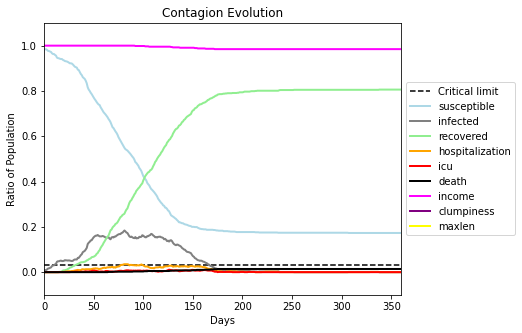

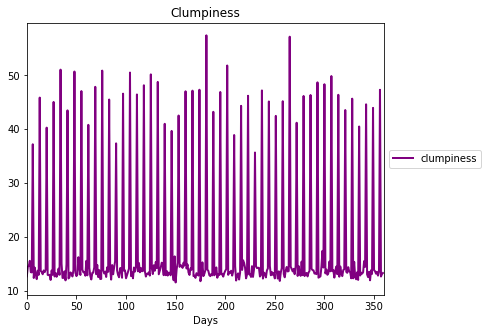

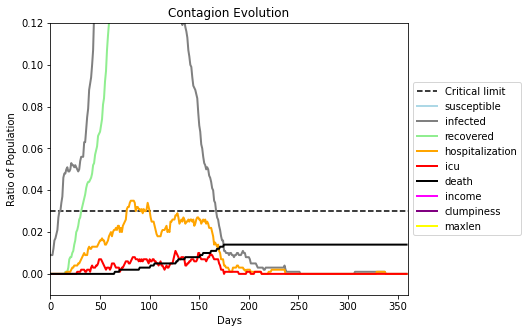

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.996
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.996", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[8402]
Average similarity between family members is 0.983591333926856 at temperature -0.995
Average similarity between family and home is 0.9998847486891481 at temperature -1
Average similarity between students and their classroom is 0.6301752812278947 at temperature -0.995
Average classroom occupancy is 11.791666666666666 and number classrooms is 24
Average similarity between workers is 0.9242587748348874 at temperature -0.995
Average office occupancy is 10.444444444444445 and number offices is 63
Average friend similarity for adults: 0.9783450551816228 for kids: 0.7424676512183438
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Tot

avg restaurant similarity 0.379086310967576
disconnects
0.01
clumpiness 12.93
maxlen 23
avg restaurant similarity 0.4392451303972122
disconnects
0.0
clumpiness 11.69
maxlen 23
avg restaurant similarity 0.5306564654531172
disconnects
0.01
clumpiness 13.57
maxlen 23
avg restaurant similarity 0.49204731066643614
disconnects
0.0
clumpiness 11.23
maxlen 21
avg restaurant similarity 0.501359101437313
disconnects
0.01
clumpiness 13.01
maxlen 22
avg restaurant similarity 0.4024504929821126
disconnects
0.01
clumpiness 12.78
maxlen 23
avg restaurant similarity 0.4899307042147537
disconnects
0.52
clumpiness 48.3
maxlen 24
avg restaurant similarity 0.4007622788882399
disconnects
0.0
clumpiness 11.57
maxlen 20
avg restaurant similarity 0.500308156035867
disconnects
0.03
clumpiness 13.22
maxlen 21
avg restaurant similarity 0.46809942915329145
disconnects
0.01
clumpiness 13.28
maxlen 27
avg restaurant similarity 0.5257217321720298
disconnects
0.0
clumpiness 12.05
maxlen 20
avg restaurant similarity 0

disconnects
0.0
clumpiness 12.89
maxlen 28
avg restaurant similarity 0.5085750998836962
disconnects
0.0
clumpiness 12.39
maxlen 23
avg restaurant similarity 0.4178447188918756
disconnects
0.0
clumpiness 11.63
maxlen 20
avg restaurant similarity 0.46290271702022356
disconnects
0.0
clumpiness 11.6
maxlen 23
avg restaurant similarity 0.5131526969807054
disconnects
0.01
clumpiness 12.98
maxlen 25
avg restaurant similarity 0.38996922472713663
disconnects
0.74
clumpiness 62.45
maxlen 23
avg restaurant similarity 0.37389024656117165
disconnects
0.0
clumpiness 12.56
maxlen 24
avg restaurant similarity 0.4437940772439315
disconnects
0.01
clumpiness 14.22
maxlen 29
avg restaurant similarity 0.4975895625126898
disconnects
0.01
clumpiness 13.69
maxlen 27
avg restaurant similarity 0.47707268179794426
disconnects
0.0
clumpiness 12.62
maxlen 23
avg restaurant similarity 0.4361342431208883
disconnects
0.0
clumpiness 12.34
maxlen 25
avg restaurant similarity 0.4162591302139785
disconnects
0.05
clumpine

avg restaurant similarity 0.4032768856232954
disconnects
0.01
clumpiness 13.95
maxlen 27
avg restaurant similarity 0.44604022241783137
disconnects
0.0
clumpiness 12.33
maxlen 27
avg restaurant similarity 0.5532388095264618
disconnects
0.01
clumpiness 11.89
maxlen 20
avg restaurant similarity 0.44673983173761816
disconnects
0.59
clumpiness 52.44
maxlen 20
avg restaurant similarity 0.43554199974231156
disconnects
0.0
clumpiness 11.79
maxlen 18
avg restaurant similarity 0.5429126896479763
disconnects
0.01
clumpiness 12.96
maxlen 23
avg restaurant similarity 0.4103843187073663
disconnects
0.04
clumpiness 14.45
maxlen 21
avg restaurant similarity 0.4852815176192684
disconnects
0.02
clumpiness 13.99
maxlen 22
avg restaurant similarity 0.531522905503624
disconnects
0.01
clumpiness 13.26
maxlen 25
avg restaurant similarity 0.414858701353464
disconnects
0.01
clumpiness 12.94
maxlen 24
avg restaurant similarity 0.43283024258975333
disconnects
0.65
clumpiness 57.37
maxlen 30
avg restaurant simila

disconnects
0.01
clumpiness 13.45
maxlen 23
avg restaurant similarity 0.5286750840021069
disconnects
0.01
clumpiness 13.35
maxlen 24
avg restaurant similarity 0.5378424430986743
disconnects
0.58
clumpiness 51.93
maxlen 31
avg restaurant similarity 0.49411541686222044
disconnects
0.02
clumpiness 12.85
maxlen 23
avg restaurant similarity 0.4616313477385599
disconnects
0.03
clumpiness 14.59
maxlen 23
avg restaurant similarity 0.4591914595544137
disconnects
0.02
clumpiness 14.22
maxlen 25
avg restaurant similarity 0.4329679532558715
disconnects
0.0
clumpiness 11.85
maxlen 22
avg restaurant similarity 0.425114784684793
disconnects
0.0
clumpiness 12.17
maxlen 26
avg restaurant similarity 0.39512084686958926
disconnects
0.01
clumpiness 12.63
maxlen 20
avg restaurant similarity 0.5974364457628115
disconnects
0.52
clumpiness 49.16
maxlen 29
avg restaurant similarity 0.5696826033557
disconnects
0.02
clumpiness 13.93
maxlen 25
avg restaurant similarity 0.5530926440646674
disconnects
0.03
clumpine

(<function dict.items>, <function dict.items>, <function dict.items>)

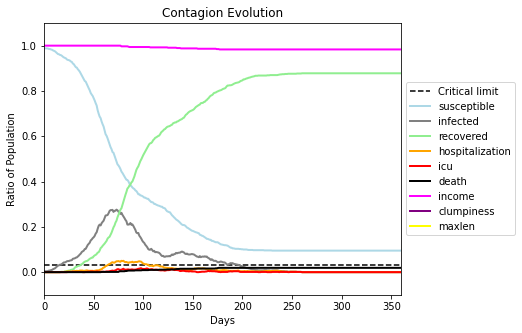

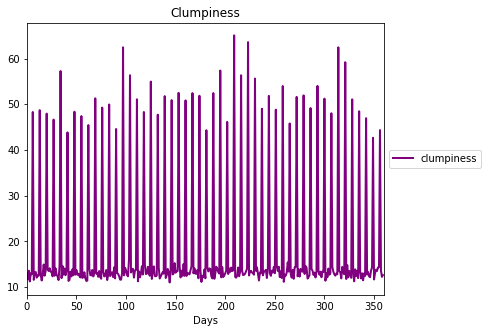

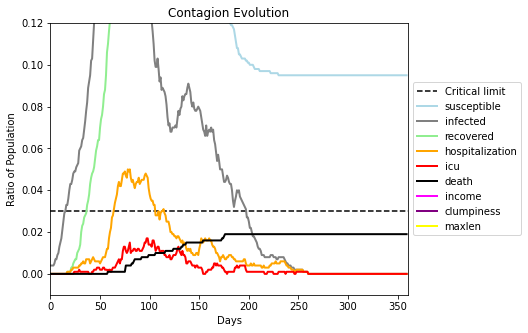

In [10]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.995
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.995", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[1302]
Average similarity between family members is 0.9785129346948716 at temperature -0.994
Average similarity between family and home is 0.9999042110580557 at temperature -1
Average similarity between students and their classroom is 0.5486566243047819 at temperature -0.994
Average classroom occupancy is 11.166666666666666 and number classrooms is 24
Average similarity between workers is 0.9381985654664787 at temperature -0.994
Average office occupancy is 10.227272727272727 and number offices is 66
Average friend similarity for adults: 0.9798007969775469 for kids: 0.7124183380966637
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
To

avg restaurant similarity 0.5149347490572879
disconnects
0.01
clumpiness 11.89
maxlen 18
avg restaurant similarity 0.35671231788635027
disconnects
0.0
clumpiness 11.09
maxlen 18
avg restaurant similarity 0.6869642899149049
disconnects
0.0
clumpiness 11.52
maxlen 22
avg restaurant similarity 0.4586156132913482
disconnects
0.0
clumpiness 11.04
maxlen 20
avg restaurant similarity 0.4976542265249972
disconnects
0.0
clumpiness 11.78
maxlen 22
avg restaurant similarity 0.5401933068425373
disconnects
0.0
clumpiness 11.79
maxlen 19
avg restaurant similarity 0.4857386598750415
disconnects
0.54
clumpiness 49.41
maxlen 29
avg restaurant similarity 0.6340790040363721
disconnects
0.01
clumpiness 12.61
maxlen 20
avg restaurant similarity 0.5648856712696823
disconnects
0.0
clumpiness 12.2
maxlen 23
avg restaurant similarity 0.5860945992925954
disconnects
0.0
clumpiness 11.69
maxlen 18
avg restaurant similarity 0.6171186384769344
disconnects
0.0
clumpiness 11.42
maxlen 19
avg restaurant similarity 0.4

avg restaurant similarity 0.519368723109282
disconnects
0.0
clumpiness 11.79
maxlen 22
avg restaurant similarity 0.5727889610224304
disconnects
0.01
clumpiness 12.04
maxlen 18
avg restaurant similarity 0.45953580488000273
disconnects
0.01
clumpiness 11.96
maxlen 21
avg restaurant similarity 0.5632087162754659
disconnects
0.0
clumpiness 12.5
maxlen 25
avg restaurant similarity 0.586848866813024
disconnects
0.54
clumpiness 48.77
maxlen 21
avg restaurant similarity 0.5414431444742825
disconnects
0.0
clumpiness 12.25
maxlen 22
avg restaurant similarity 0.7001720720086264
disconnects
0.0
clumpiness 12.5
maxlen 25
avg restaurant similarity 0.5484075018476502
disconnects
0.01
clumpiness 12.26
maxlen 21
avg restaurant similarity 0.6040160625128206
disconnects
0.0
clumpiness 11.87
maxlen 22
avg restaurant similarity 0.5884494474691488
disconnects
0.01
clumpiness 13.29
maxlen 26
avg restaurant similarity 0.6145833656845496
disconnects
0.0
clumpiness 12.19
maxlen 20
avg restaurant similarity 0.61

avg restaurant similarity 0.6593328311648153
disconnects
0.01
clumpiness 12.27
maxlen 19
avg restaurant similarity 0.5620919755484873
disconnects
0.0
clumpiness 11.57
maxlen 23
avg restaurant similarity 0.6064435544925382
disconnects
0.6
clumpiness 52.86
maxlen 21
avg restaurant similarity 0.553499042180918
disconnects
0.0
clumpiness 12.23
maxlen 21
avg restaurant similarity 0.5249223490785203
disconnects
0.0
clumpiness 12.08
maxlen 22
avg restaurant similarity 0.4618679275529785
disconnects
0.01
clumpiness 12.31
maxlen 19
avg restaurant similarity 0.6533613415978434
disconnects
0.03
clumpiness 13.46
maxlen 21
avg restaurant similarity 0.5402872696195351
disconnects
0.01
clumpiness 12.09
maxlen 21
avg restaurant similarity 0.5025693214681085
disconnects
0.0
clumpiness 11.74
maxlen 20
avg restaurant similarity 0.5616675900115531
disconnects
0.57
clumpiness 51.31
maxlen 26
avg restaurant similarity 0.5989410883806852
disconnects
0.0
clumpiness 11.42
maxlen 19
avg restaurant similarity 0.

avg restaurant similarity 0.5814066237160624
disconnects
0.58
clumpiness 52.25
maxlen 29
avg restaurant similarity 0.5362624166008276
disconnects
0.02
clumpiness 13.06
maxlen 19
avg restaurant similarity 0.4566455980095684
disconnects
0.0
clumpiness 11.1
maxlen 20
avg restaurant similarity 0.6104356404204269
disconnects
0.0
clumpiness 11.32
maxlen 21
avg restaurant similarity 0.6114229385647951
disconnects
0.02
clumpiness 13.54
maxlen 24
avg restaurant similarity 0.5961556070977897
disconnects
0.0
clumpiness 11.8
maxlen 18
avg restaurant similarity 0.6300724879936802
disconnects
0.0
clumpiness 11.61
maxlen 20
avg restaurant similarity 0.5354523781823621
disconnects
0.66
clumpiness 57.42
maxlen 26
avg restaurant similarity 0.5520613853939336
disconnects
0.02
clumpiness 13.78
maxlen 21
avg restaurant similarity 0.6002204633534128
disconnects
0.02
clumpiness 12.86
maxlen 18
avg restaurant similarity 0.567126241111924
disconnects
0.03
clumpiness 12.81
maxlen 18
avg restaurant similarity 0.

(<function dict.items>, <function dict.items>, <function dict.items>)

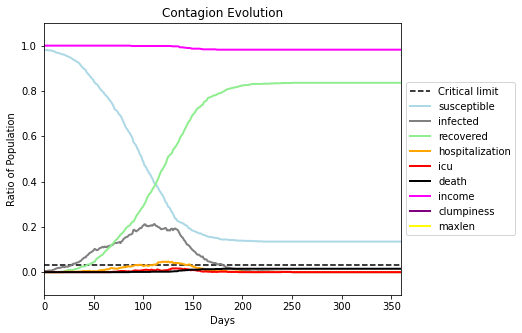

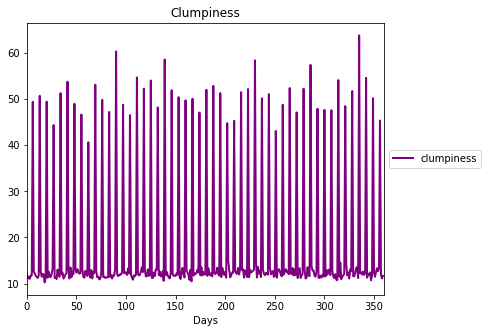

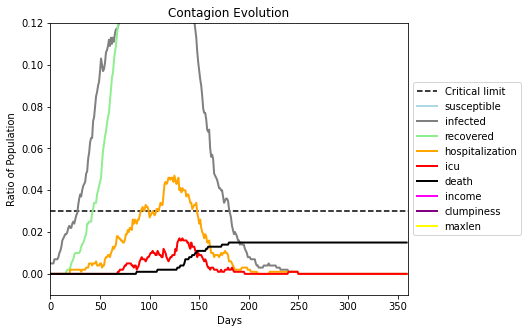

In [11]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.994
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.994", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[5166]
Average similarity between family members is 0.9824993042539362 at temperature -0.993
Average similarity between family and home is 0.9998976067138047 at temperature -1
Average similarity between students and their classroom is 0.5324526787000252 at temperature -0.993
Average classroom occupancy is 12.875 and number classrooms is 24
Average similarity between workers is 0.9223302274875383 at temperature -0.993
Average office occupancy is 9.8 and number offices is 65
Average friend similarity for adults: 0.969279163556323 for kids: 0.7050225186597618
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in

avg restaurant similarity 0.495433244759007
disconnects
0.0
clumpiness 12.8
maxlen 23
avg restaurant similarity 0.438332061059374
disconnects
0.0
clumpiness 11.02
maxlen 20
avg restaurant similarity 0.6492202852618179
disconnects
0.01
clumpiness 12.19
maxlen 22
avg restaurant similarity 0.4314305688228069
disconnects
0.0
clumpiness 11.83
maxlen 20
avg restaurant similarity 0.4291821503996552
disconnects
0.01
clumpiness 12.19
maxlen 21
avg restaurant similarity 0.36597153599844096
disconnects
0.03
clumpiness 13.32
maxlen 23
avg restaurant similarity 0.3731571067600412
disconnects
0.61
clumpiness 53.44
maxlen 21
avg restaurant similarity 0.5399387333770301
disconnects
0.01
clumpiness 12.76
maxlen 20
avg restaurant similarity 0.431103129136569
disconnects
0.01
clumpiness 12.28
maxlen 28
avg restaurant similarity 0.47696304290396035
disconnects
0.01
clumpiness 12.71
maxlen 23
avg restaurant similarity 0.3757290693415986
disconnects
0.0
clumpiness 12.22
maxlen 21
avg restaurant similarity 0

disconnects
0.02
clumpiness 14.19
maxlen 24
avg restaurant similarity 0.3688151147443013
disconnects
0.02
clumpiness 13.69
maxlen 29
avg restaurant similarity 0.37956008752357423
disconnects
0.02
clumpiness 13.64
maxlen 20
avg restaurant similarity 0.3163664798605689
disconnects
0.01
clumpiness 12.96
maxlen 25
avg restaurant similarity 0.4505974714588492
disconnects
0.02
clumpiness 14.46
maxlen 26
avg restaurant similarity 0.342916637408016
disconnects
0.37
clumpiness 39.68
maxlen 35
avg restaurant similarity 0.34728660688874213
disconnects
0.01
clumpiness 13.29
maxlen 25
avg restaurant similarity 0.3692275032067387
disconnects
0.01
clumpiness 12.34
maxlen 22
avg restaurant similarity 0.3810313336229474
disconnects
0.02
clumpiness 14.14
maxlen 24
avg restaurant similarity 0.37849861260685047
disconnects
0.03
clumpiness 14.16
maxlen 23
avg restaurant similarity 0.3418112154935946
disconnects
0.02
clumpiness 14.25
maxlen 25
avg restaurant similarity 0.3759665091720766
disconnects
0.0
clu

avg restaurant similarity 0.43886821174308416
disconnects
0.0
clumpiness 11.98
maxlen 26
avg restaurant similarity 0.4203246603213609
disconnects
0.02
clumpiness 13.07
maxlen 21
avg restaurant similarity 0.39973563392544365
disconnects
0.0
clumpiness 12.03
maxlen 21
avg restaurant similarity 0.538926610679758
disconnects
0.42
clumpiness 44.17
maxlen 40
avg restaurant similarity 0.5060266244343338
disconnects
0.01
clumpiness 11.7
maxlen 18
avg restaurant similarity 0.27237769112109145
disconnects
0.0
clumpiness 12.64
maxlen 24
avg restaurant similarity 0.2630087029969488
disconnects
0.01
clumpiness 13.37
maxlen 26
avg restaurant similarity 0.38120569844984165
disconnects
0.02
clumpiness 13.87
maxlen 28
avg restaurant similarity 0.38234442154562737
disconnects
0.01
clumpiness 12.1
maxlen 21
avg restaurant similarity 0.5153623369234233
disconnects
0.0
clumpiness 11.8
maxlen 21
avg restaurant similarity 0.4293791012972661
disconnects
0.41
clumpiness 42.31
maxlen 31
avg restaurant similarit

disconnects
0.02
clumpiness 12.91
maxlen 21
avg restaurant similarity 0.46698190042474985
disconnects
0.02
clumpiness 13.0
maxlen 27
avg restaurant similarity 0.39799288058325505
disconnects
0.39
clumpiness 42.19
maxlen 38
avg restaurant similarity 0.36297314685090204
disconnects
0.03
clumpiness 13.76
maxlen 20
avg restaurant similarity 0.36651874253588385
disconnects
0.03
clumpiness 13.75
maxlen 27
avg restaurant similarity 0.4906855217938131
disconnects
0.01
clumpiness 12.34
maxlen 23
avg restaurant similarity 0.5505388670288314
disconnects
0.02
clumpiness 13.7
maxlen 25
avg restaurant similarity 0.3402502058647718
disconnects
0.05
clumpiness 15.68
maxlen 21
avg restaurant similarity 0.32944797741165627
disconnects
0.04
clumpiness 14.62
maxlen 27
avg restaurant similarity 0.3642497982781664
disconnects
0.61
clumpiness 54.38
maxlen 26
avg restaurant similarity 0.7173903251036221
disconnects
0.01
clumpiness 12.76
maxlen 24
avg restaurant similarity 0.48831725898419587
disconnects
0.0
c

(<function dict.items>, <function dict.items>, <function dict.items>)

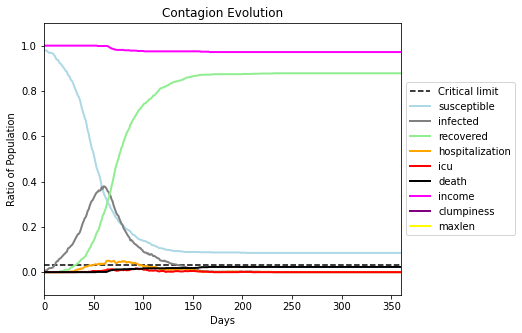

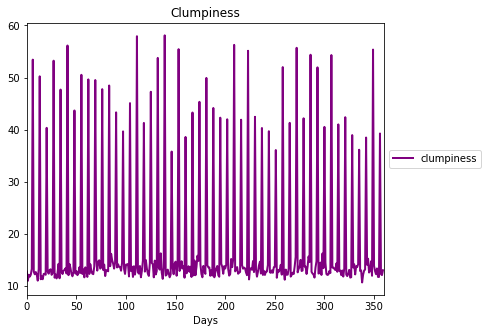

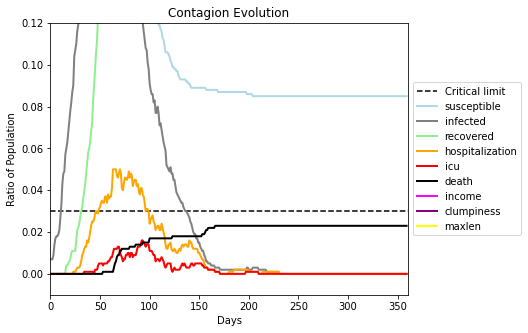

In [12]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.993
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.993", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[582]
Average similarity between family members is 0.9800248711258014 at temperature -0.992
Average similarity between family and home is 0.9998974255292199 at temperature -1
Average similarity between students and their classroom is 0.4378347508145966 at temperature -0.992
Average classroom occupancy is 12.708333333333334 and number classrooms is 24
Average similarity between workers is 0.9342868287289825 at temperature -0.992
Average office occupancy is 9.712121212121213 and number offices is 66
Average friend similarity for adults: 0.9645643677724082 for kids: 0.665425159132748
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total of 3 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total

avg restaurant similarity 0.480827134248146
disconnects
0.0
clumpiness 10.46
maxlen 17
avg restaurant similarity 0.5766722144243065
disconnects
0.02
clumpiness 12.22
maxlen 18
avg restaurant similarity 0.5132116815313117
disconnects
0.0
clumpiness 10.89
maxlen 18
avg restaurant similarity 0.5210320205341021
disconnects
0.0
clumpiness 11.09
maxlen 21
avg restaurant similarity 0.4843475708571851
disconnects
0.01
clumpiness 11.56
maxlen 17
avg restaurant similarity 0.5973821930018964
disconnects
0.01
clumpiness 11.82
maxlen 21
avg restaurant similarity 0.3660120825350807
disconnects
0.41
clumpiness 42.91
maxlen 33
avg restaurant similarity 0.48345038177174504
disconnects
0.01
clumpiness 12.21
maxlen 19
avg restaurant similarity 0.5506664241579805
disconnects
0.01
clumpiness 11.11
maxlen 18
avg restaurant similarity 0.4541339723753285
disconnects
0.0
clumpiness 10.72
maxlen 20
avg restaurant similarity 0.40910147257968366
disconnects
0.0
clumpiness 10.88
maxlen 18
avg restaurant similarity

avg restaurant similarity 0.4419420573952673
disconnects
0.01
clumpiness 11.88
maxlen 20
avg restaurant similarity 0.5426828226794191
disconnects
0.0
clumpiness 11.86
maxlen 19
avg restaurant similarity 0.5705523957494298
disconnects
0.0
clumpiness 11.75
maxlen 21
avg restaurant similarity 0.6730658794491032
disconnects
0.02
clumpiness 12.87
maxlen 21
avg restaurant similarity 0.6982969619316521
disconnects
0.4
clumpiness 41.97
maxlen 35
avg restaurant similarity 0.5480534900018476
disconnects
0.02
clumpiness 12.69
maxlen 18
avg restaurant similarity 0.5591909409757727
disconnects
0.0
clumpiness 10.9
maxlen 20
avg restaurant similarity 0.5110296383661068
disconnects
0.0
clumpiness 11.1
maxlen 19
avg restaurant similarity 0.5715902402989443
disconnects
0.01
clumpiness 11.65
maxlen 18
avg restaurant similarity 0.6090961993550041
disconnects
0.0
clumpiness 11.22
maxlen 18
avg restaurant similarity 0.6021293759231513
disconnects
0.0
clumpiness 10.98
maxlen 18
avg restaurant similarity 0.56

avg restaurant similarity 0.5202935633751137
disconnects
0.0
clumpiness 10.69
maxlen 18
avg restaurant similarity 0.43790146258720414
disconnects
0.0
clumpiness 11.6
maxlen 20
avg restaurant similarity 0.4404519621238722
disconnects
0.45
clumpiness 42.73
maxlen 21
avg restaurant similarity 0.5599133256108332
disconnects
0.0
clumpiness 11.12
maxlen 20
avg restaurant similarity 0.62671355664801
disconnects
0.0
clumpiness 11.25
maxlen 18
avg restaurant similarity 0.6089153777949
disconnects
0.0
clumpiness 10.83
maxlen 21
avg restaurant similarity 0.5444209926640551
disconnects
0.0
clumpiness 11.25
maxlen 20
avg restaurant similarity 0.46566483787286267
disconnects
0.01
clumpiness 11.62
maxlen 20
avg restaurant similarity 0.6185083365051989
disconnects
0.0
clumpiness 11.73
maxlen 19
avg restaurant similarity 0.503303232155627
disconnects
0.42
clumpiness 42.33
maxlen 31
avg restaurant similarity 0.5713604938793898
disconnects
0.01
clumpiness 12.21
maxlen 19
avg restaurant similarity 0.63978

avg restaurant similarity 0.3680844858936776
disconnects
0.35
clumpiness 36.9
maxlen 23
avg restaurant similarity 0.46010670640876633
disconnects
0.01
clumpiness 11.9
maxlen 19
avg restaurant similarity 0.4507011193249493
disconnects
0.0
clumpiness 11.17
maxlen 20
avg restaurant similarity 0.5336493633229485
disconnects
0.01
clumpiness 12.77
maxlen 21
avg restaurant similarity 0.5376315098385961
disconnects
0.01
clumpiness 11.59
maxlen 19
avg restaurant similarity 0.5188133386604293
disconnects
0.01
clumpiness 11.97
maxlen 26
avg restaurant similarity 0.6834411525996803
disconnects
0.0
clumpiness 11.0
maxlen 18
avg restaurant similarity 0.49949187685270185
disconnects
0.32
clumpiness 36.24
maxlen 33
avg restaurant similarity 0.4576746556300267
disconnects
0.01
clumpiness 11.9
maxlen 20
avg restaurant similarity 0.483408396490595
disconnects
0.0
clumpiness 10.88
maxlen 17
avg restaurant similarity 0.594277625448992
disconnects
0.01
clumpiness 12.61
maxlen 22
avg restaurant similarity 0.

(<function dict.items>, <function dict.items>, <function dict.items>)

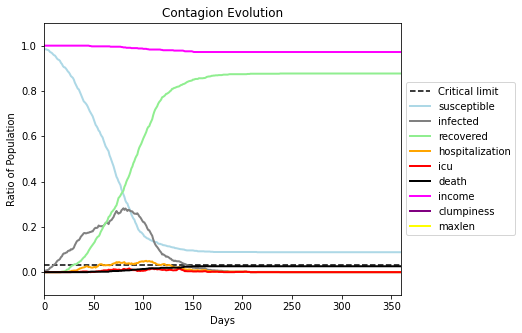

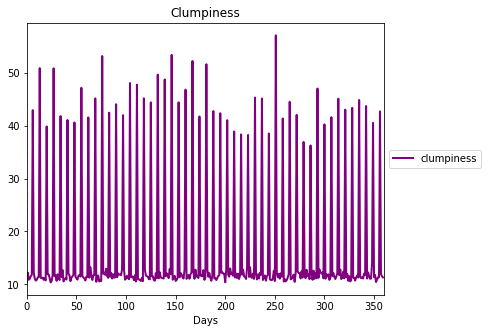

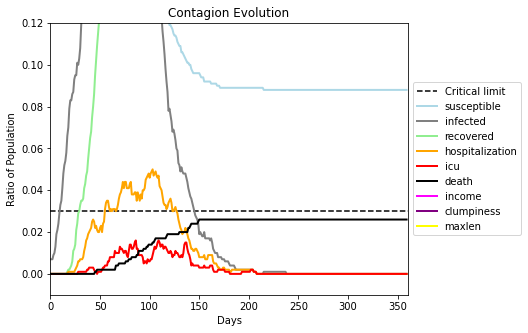

In [13]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.992
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.992", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[3317]
Average similarity between family members is 0.9851149592706141 at temperature -0.991
Average similarity between family and home is 0.9998944239197951 at temperature -1
Average similarity between students and their classroom is 0.5383573189028449 at temperature -0.991
Average classroom occupancy is 11.458333333333334 and number classrooms is 24
Average similarity between workers is 0.8907793033545329 at temperature -0.991
Average office occupancy is 10 and number offices is 66
Average friend similarity for adults: 0.946170088116792 for kids: 0.6702427378500735
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people a

avg restaurant similarity 0.4548602868366233
disconnects
0.0
clumpiness 10.06
maxlen 17
avg restaurant similarity 0.3819121180253457
disconnects
0.0
clumpiness 10.53
maxlen 17
avg restaurant similarity 0.5234532510566017
disconnects
0.0
clumpiness 9.97
maxlen 16
avg restaurant similarity 0.4581205552793151
disconnects
0.0
clumpiness 11.02
maxlen 21
avg restaurant similarity 0.5131909495889413
disconnects
0.0
clumpiness 9.79
maxlen 15
avg restaurant similarity 0.4896230567018161
disconnects
0.0
clumpiness 10.42
maxlen 17
avg restaurant similarity 0.409418868331799
disconnects
0.49
clumpiness 44.85
maxlen 22
avg restaurant similarity 0.4447798711578811
disconnects
0.0
clumpiness 10.57
maxlen 16
avg restaurant similarity 0.3750034515797501
disconnects
0.0
clumpiness 10.35
maxlen 19
avg restaurant similarity 0.4476817399017141
disconnects
0.0
clumpiness 10.35
maxlen 17
avg restaurant similarity 0.5210303789625906
disconnects
0.0
clumpiness 10.67
maxlen 19
avg restaurant similarity 0.536144

avg restaurant similarity 0.5975330268511437
disconnects
0.0
clumpiness 10.78
maxlen 19
avg restaurant similarity 0.49841380852555844
disconnects
0.0
clumpiness 12.09
maxlen 20
avg restaurant similarity 0.42241014703805363
disconnects
0.0
clumpiness 11.64
maxlen 19
avg restaurant similarity 0.5322333063545234
disconnects
0.0
clumpiness 11.74
maxlen 25
avg restaurant similarity 0.4074774342886887
disconnects
0.61
clumpiness 53.45
maxlen 23
avg restaurant similarity 0.5608672542395753
disconnects
0.0
clumpiness 11.56
maxlen 23
avg restaurant similarity 0.609629456180043
disconnects
0.01
clumpiness 12.04
maxlen 19
avg restaurant similarity 0.6140310604612629
disconnects
0.0
clumpiness 11.33
maxlen 20
avg restaurant similarity 0.39807961768777833
disconnects
0.01
clumpiness 12.08
maxlen 19
avg restaurant similarity 0.5006376684794875
disconnects
0.0
clumpiness 11.46
maxlen 21
avg restaurant similarity 0.5321321429977658
disconnects
0.0
clumpiness 10.8
maxlen 18
avg restaurant similarity 0.

disconnects
0.0
clumpiness 10.91
maxlen 19
avg restaurant similarity 0.5458501939038171
disconnects
0.02
clumpiness 11.73
maxlen 17
avg restaurant similarity 0.5270970493540118
disconnects
0.01
clumpiness 12.11
maxlen 20
avg restaurant similarity 0.5449640625966604
disconnects
0.43
clumpiness 42.02
maxlen 22
avg restaurant similarity 0.49744522712162953
disconnects
0.0
clumpiness 10.74
maxlen 19
avg restaurant similarity 0.5783774798260304
disconnects
0.0
clumpiness 11.11
maxlen 20
avg restaurant similarity 0.48217516108451447
disconnects
0.01
clumpiness 11.17
maxlen 19
avg restaurant similarity 0.5290103259513
disconnects
0.0
clumpiness 10.86
maxlen 17
avg restaurant similarity 0.38843337067932027
disconnects
0.0
clumpiness 11.0
maxlen 18
avg restaurant similarity 0.5301264714485463
disconnects
0.01
clumpiness 12.25
maxlen 20
avg restaurant similarity 0.5565207224967497
disconnects
0.33
clumpiness 35.62
maxlen 22
avg restaurant similarity 0.48442168137317376
disconnects
0.0
clumpiness

avg restaurant similarity 0.4812871546871271
disconnects
0.02
clumpiness 11.94
maxlen 22
avg restaurant similarity 0.44080349234930744
disconnects
0.44
clumpiness 42.52
maxlen 19
avg restaurant similarity 0.5450752871861525
disconnects
0.0
clumpiness 10.65
maxlen 17
avg restaurant similarity 0.45286999986221277
disconnects
0.0
clumpiness 10.54
maxlen 16
avg restaurant similarity 0.4520369833868805
disconnects
0.01
clumpiness 11.13
maxlen 19
avg restaurant similarity 0.48226595634953745
disconnects
0.01
clumpiness 11.7
maxlen 18
avg restaurant similarity 0.40110858543506855
disconnects
0.01
clumpiness 10.55
maxlen 16
avg restaurant similarity 0.43994698948087996
disconnects
0.01
clumpiness 10.96
maxlen 18
avg restaurant similarity 0.4309954297690952
disconnects
0.43
clumpiness 42.37
maxlen 23
avg restaurant similarity 0.36315736548486505
disconnects
0.01
clumpiness 11.19
maxlen 19
avg restaurant similarity 0.5363889396071434
disconnects
0.01
clumpiness 10.96
maxlen 18
avg restaurant sim

(<function dict.items>, <function dict.items>, <function dict.items>)

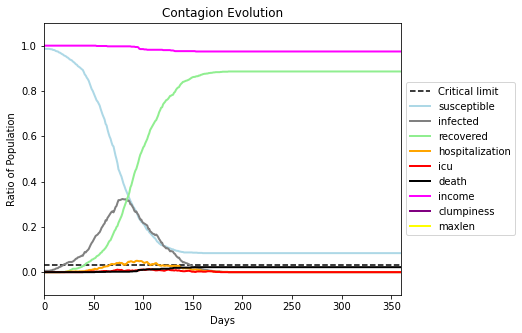

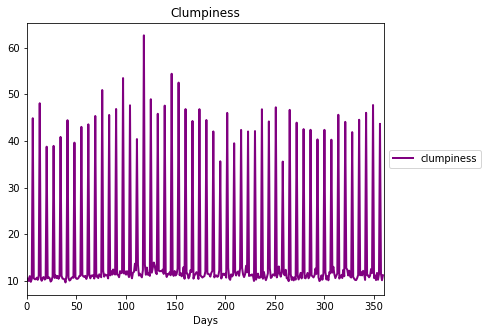

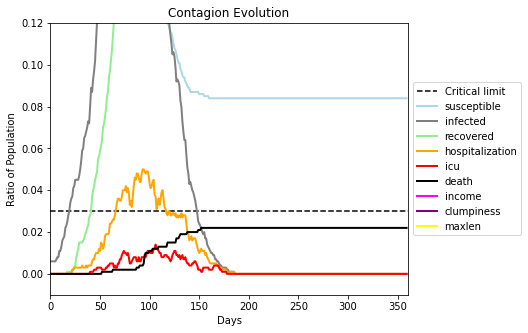

In [14]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.991
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.991", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[8316]
Average similarity between family members is 0.971612113717601 at temperature -0.99
Average similarity between family and home is 0.999895556934986 at temperature -1
Average similarity between students and their classroom is 0.4709288927968298 at temperature -0.99
Average classroom occupancy is 11.25 and number classrooms is 24
Average similarity between workers is 0.8467526602328012 at temperature -0.99
Average office occupancy is 10.227272727272727 and number offices is 66
Average friend similarity for adults: 0.9289484210643728 for kids: 0.6631744452474083
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people al

avg restaurant similarity 0.3529208360582727
disconnects
0.0
clumpiness 10.69
maxlen 18
avg restaurant similarity 0.31914917648450125
disconnects
0.0
clumpiness 10.62
maxlen 17
avg restaurant similarity 0.33737794124785503
disconnects
0.0
clumpiness 10.7
maxlen 18
avg restaurant similarity 0.3904104614607879
disconnects
0.0
clumpiness 10.43
maxlen 18
avg restaurant similarity 0.3396662589158747
disconnects
0.0
clumpiness 10.5
maxlen 19
avg restaurant similarity 0.3497675050944983
disconnects
0.0
clumpiness 10.6
maxlen 19
avg restaurant similarity 0.44540243418135717
disconnects
0.49
clumpiness 46.5
maxlen 26
avg restaurant similarity 0.4361900471322805
disconnects
0.0
clumpiness 10.05
maxlen 17
avg restaurant similarity 0.25594180334357974
disconnects
0.0
clumpiness 10.34
maxlen 17
avg restaurant similarity 0.361538360263835
disconnects
0.0
clumpiness 10.37
maxlen 18
avg restaurant similarity 0.30357282154684717
disconnects
0.0
clumpiness 10.28
maxlen 19
avg restaurant similarity 0.292

avg restaurant similarity 0.2511593869952347
disconnects
0.0
clumpiness 10.48
maxlen 22
avg restaurant similarity 0.30122938017693396
disconnects
0.0
clumpiness 10.91
maxlen 19
avg restaurant similarity 0.29184576435881315
disconnects
0.0
clumpiness 10.47
maxlen 23
avg restaurant similarity 0.44623861203236914
disconnects
0.0
clumpiness 10.46
maxlen 17
avg restaurant similarity 0.30360597426190283
disconnects
0.72
clumpiness 61.11
maxlen 23
avg restaurant similarity 0.2747799042299618
disconnects
0.0
clumpiness 10.28
maxlen 19
avg restaurant similarity 0.2919413600551789
disconnects
0.0
clumpiness 10.63
maxlen 17
avg restaurant similarity 0.36023263293754176
disconnects
0.0
clumpiness 11.03
maxlen 20
avg restaurant similarity 0.344317895757036
disconnects
0.0
clumpiness 10.96
maxlen 19
avg restaurant similarity 0.3403778262337435
disconnects
0.0
clumpiness 10.76
maxlen 19
avg restaurant similarity 0.32707869478908913
disconnects
0.0
clumpiness 10.59
maxlen 17
avg restaurant similarity 

disconnects
0.0
clumpiness 10.45
maxlen 17
avg restaurant similarity 0.25621006946233743
disconnects
0.01
clumpiness 11.36
maxlen 17
avg restaurant similarity 0.31259966092682406
disconnects
0.0
clumpiness 10.84
maxlen 19
avg restaurant similarity 0.2717838851382583
disconnects
0.45
clumpiness 44.38
maxlen 29
avg restaurant similarity 0.2993836817577283
disconnects
0.0
clumpiness 10.67
maxlen 20
avg restaurant similarity 0.22548709742061507
disconnects
0.0
clumpiness 10.4
maxlen 18
avg restaurant similarity 0.24899789115749524
disconnects
0.0
clumpiness 10.68
maxlen 17
avg restaurant similarity 0.36606536076621204
disconnects
0.0
clumpiness 10.46
maxlen 17
avg restaurant similarity 0.19543130228498093
disconnects
0.01
clumpiness 11.12
maxlen 20
avg restaurant similarity 0.2210225839199114
disconnects
0.0
clumpiness 10.49
maxlen 19
avg restaurant similarity 0.2840344340171833
disconnects
0.45
clumpiness 43.72
maxlen 23
avg restaurant similarity 0.2981696972833267
disconnects
0.0
clumpin

avg restaurant similarity 0.32640795156777197
disconnects
0.0
clumpiness 10.31
maxlen 19
avg restaurant similarity 0.3145943886108795
disconnects
0.49
clumpiness 46.37
maxlen 31
avg restaurant similarity 0.42663544140118725
disconnects
0.0
clumpiness 10.46
maxlen 17
avg restaurant similarity 0.33728161749957025
disconnects
0.0
clumpiness 10.66
maxlen 19
avg restaurant similarity 0.3893730689098292
disconnects
0.0
clumpiness 10.44
maxlen 19
avg restaurant similarity 0.4093556562986515
disconnects
0.0
clumpiness 10.13
maxlen 17
avg restaurant similarity 0.3682736547197698
disconnects
0.0
clumpiness 11.0
maxlen 19
avg restaurant similarity 0.22980936219025533
disconnects
0.0
clumpiness 10.89
maxlen 20
avg restaurant similarity 0.3692435756944044
disconnects
0.55
clumpiness 49.49
maxlen 24
avg restaurant similarity 0.3883183351556133
disconnects
0.02
clumpiness 11.97
maxlen 17
avg restaurant similarity 0.3196747966638804
disconnects
0.01
clumpiness 11.93
maxlen 20
avg restaurant similarity

(<function dict.items>, <function dict.items>, <function dict.items>)

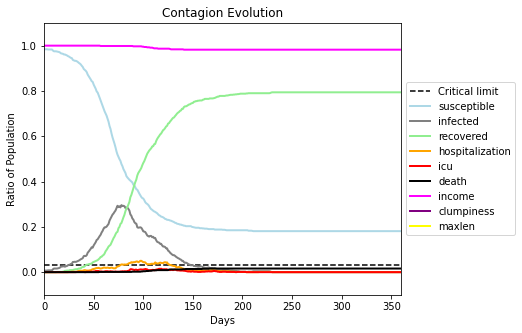

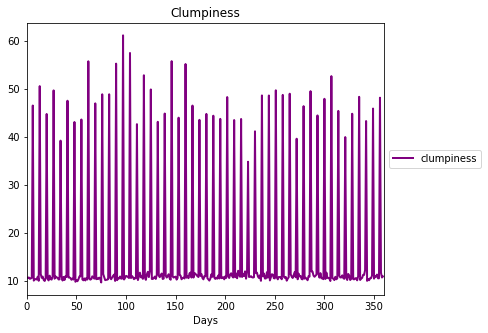

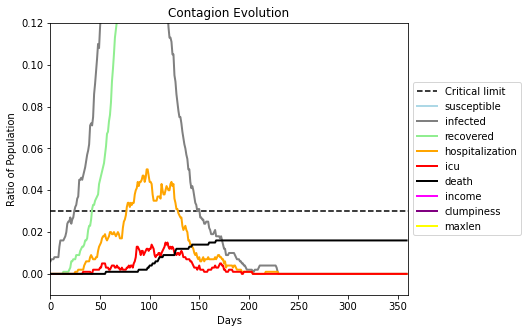

In [15]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.99
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.99", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[7131]
Average similarity between family members is 0.9540873768181032 at temperature -0.98
Average similarity between family and home is 0.9998876481817165 at temperature -1
Average similarity between students and their classroom is 0.29997995807457645 at temperature -0.98
Average classroom occupancy is 12.291666666666666 and number classrooms is 24
Average similarity between workers is 0.732090748726465 at temperature -0.98
Average office occupancy is 9.772727272727273 and number offices is 66
Average friend similarity for adults: 0.8404874886787961 for kids: 0.5731820965431392
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 4 people.
Total of 4 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 3 people.
Total 

avg restaurant similarity 0.3866297419997545
disconnects
0.02
clumpiness 10.34
maxlen 14
avg restaurant similarity 0.25941682698022595
disconnects
0.02
clumpiness 10.75
maxlen 17
avg restaurant similarity 0.22221627588122508
disconnects
0.03
clumpiness 11.5
maxlen 20
avg restaurant similarity 0.2182624565386463
disconnects
0.01
clumpiness 9.87
maxlen 14
avg restaurant similarity 0.33636608394752926
disconnects
0.02
clumpiness 11.02
maxlen 14
avg restaurant similarity 0.24102096230709152
disconnects
0.01
clumpiness 9.93
maxlen 14
avg restaurant similarity 0.2266376988231212
disconnects
0.37
clumpiness 38.09
maxlen 23
avg restaurant similarity 0.22226173451269338
disconnects
0.03
clumpiness 11.06
maxlen 14
avg restaurant similarity 0.17568357022966566
disconnects
0.0
clumpiness 9.0
maxlen 14
avg restaurant similarity 0.3097804655258943
disconnects
0.01
clumpiness 9.92
maxlen 14
avg restaurant similarity 0.2619879497018411
disconnects
0.05
clumpiness 12.9
maxlen 13
avg restaurant similari

avg restaurant similarity 0.236750238044722
disconnects
0.03
clumpiness 11.47
maxlen 14
avg restaurant similarity 0.2265999287622171
disconnects
0.01
clumpiness 10.05
maxlen 17
avg restaurant similarity 0.3023286549921522
disconnects
0.01
clumpiness 10.06
maxlen 13
avg restaurant similarity 0.21514836860424533
disconnects
0.0
clumpiness 9.47
maxlen 18
avg restaurant similarity 0.12085979657722302
disconnects
0.02
clumpiness 10.74
maxlen 17
avg restaurant similarity 0.32293225581370566
disconnects
0.52
clumpiness 47.61
maxlen 22
avg restaurant similarity 0.15580660908826044
disconnects
0.02
clumpiness 10.85
maxlen 15
avg restaurant similarity 0.43688320602859454
disconnects
0.02
clumpiness 10.88
maxlen 15
avg restaurant similarity 0.13359677273138507
disconnects
0.05
clumpiness 13.01
maxlen 16
avg restaurant similarity 0.4761977146355092
disconnects
0.02
clumpiness 10.53
maxlen 13
avg restaurant similarity 0.26433256046610765
disconnects
0.0
clumpiness 9.25
maxlen 17
avg restaurant simi

avg restaurant similarity 0.32599576668646907
disconnects
0.0
clumpiness 9.24
maxlen 15
avg restaurant similarity 0.2160746848325822
disconnects
0.02
clumpiness 10.79
maxlen 15
avg restaurant similarity 0.14570806130075456
disconnects
0.01
clumpiness 9.85
maxlen 17
avg restaurant similarity 0.18508864123209914
disconnects
0.02
clumpiness 11.03
maxlen 15
avg restaurant similarity 0.2147245680152616
disconnects
0.46
clumpiness 43.24
maxlen 23
avg restaurant similarity 0.1907085773471058
disconnects
0.02
clumpiness 10.72
maxlen 17
avg restaurant similarity 0.11200009620057275
disconnects
0.02
clumpiness 10.25
maxlen 14
avg restaurant similarity 0.36682648161832165
disconnects
0.0
clumpiness 9.72
maxlen 14
avg restaurant similarity 0.22571670115909875
disconnects
0.01
clumpiness 9.7
maxlen 16
avg restaurant similarity 0.10858724191077147
disconnects
0.01
clumpiness 10.23
maxlen 15
avg restaurant similarity 0.23098094610393416
disconnects
0.0
clumpiness 9.39
maxlen 14
avg restaurant similar

avg restaurant similarity 0.2625999530761779
disconnects
0.0
clumpiness 9.47
maxlen 15
avg restaurant similarity 0.1523230818854511
disconnects
0.01
clumpiness 9.98
maxlen 14
avg restaurant similarity 0.11799125297757757
disconnects
0.03
clumpiness 11.49
maxlen 14
avg restaurant similarity 0.1352601590411599
disconnects
0.42
clumpiness 40.78
maxlen 19
avg restaurant similarity 0.1125026232409484
disconnects
0.03
clumpiness 11.41
maxlen 15
avg restaurant similarity 0.17016271788020568
disconnects
0.03
clumpiness 11.44
maxlen 17
avg restaurant similarity 0.377168944096572
disconnects
0.01
clumpiness 10.04
maxlen 15
avg restaurant similarity 0.24649948201353467
disconnects
0.03
clumpiness 11.54
maxlen 14
avg restaurant similarity 0.2092303776039307
disconnects
0.05
clumpiness 13.0
maxlen 16
avg restaurant similarity 0.26543187418486686
disconnects
0.02
clumpiness 10.83
maxlen 16
avg restaurant similarity 0.31428710479826366
disconnects
0.45
clumpiness 42.89
maxlen 23
avg restaurant simila

(<function dict.items>, <function dict.items>, <function dict.items>)

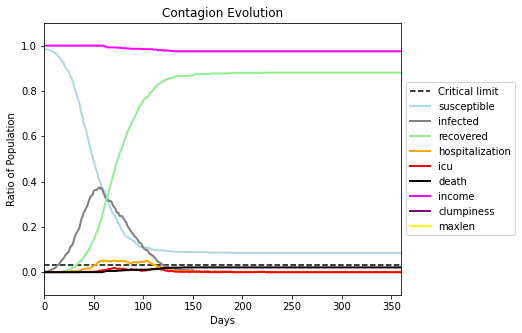

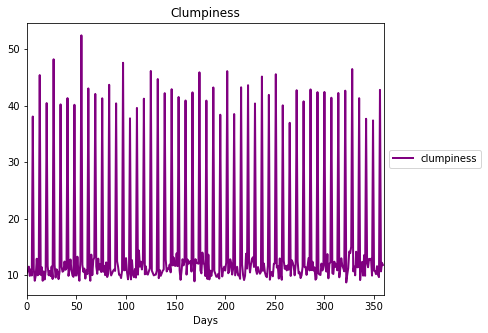

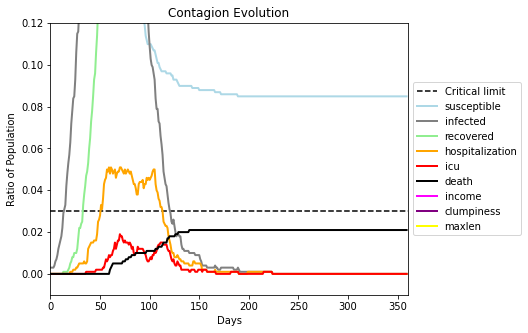

In [16]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.98
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.989", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[5364]
Average similarity between family members is 0.9429439332920562 at temperature -0.97
Average similarity between family and home is 0.9999009946987557 at temperature -1
Average similarity between students and their classroom is 0.45548462793020544 at temperature -0.97
Average classroom occupancy is 12.083333333333334 and number classrooms is 24
Average similarity between workers is 0.6573261704214811 at temperature -0.97
Average office occupancy is 10.2 and number offices is 65
Average friend similarity for adults: 0.8033679282423982 for kids: 0.5799312791826795
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 1 allocated units with a total of 2 people.
Total of 2 people 

avg restaurant similarity 0.08367248820409148
disconnects
0.0
clumpiness 8.98
maxlen 14
avg restaurant similarity 0.27442179440467557
disconnects
0.0
clumpiness 9.31
maxlen 14
avg restaurant similarity 0.2347684698994646
disconnects
0.01
clumpiness 9.37
maxlen 14
avg restaurant similarity 0.26497675215903843
disconnects
0.02
clumpiness 10.78
maxlen 14
avg restaurant similarity 0.1859708045057176
disconnects
0.01
clumpiness 10.12
maxlen 14
avg restaurant similarity 0.24904770008296712
disconnects
0.01
clumpiness 9.84
maxlen 13
avg restaurant similarity 0.22667982229964243
disconnects
0.42
clumpiness 41.26
maxlen 23
avg restaurant similarity 0.3420529781012239
disconnects
0.0
clumpiness 9.1
maxlen 13
avg restaurant similarity 0.18651210230950632
disconnects
0.01
clumpiness 9.58
maxlen 14
avg restaurant similarity 0.2100838309987879
disconnects
0.0
clumpiness 9.21
maxlen 14
avg restaurant similarity 0.2449130423151167
disconnects
0.02
clumpiness 10.52
maxlen 16
avg restaurant similarity 0

avg restaurant similarity 0.14447871404072715
disconnects
0.02
clumpiness 10.25
maxlen 17
avg restaurant similarity 0.01657721980337655
disconnects
0.0
clumpiness 9.39
maxlen 14
avg restaurant similarity 0.27551001362927846
disconnects
0.0
clumpiness 9.32
maxlen 15
avg restaurant similarity 0.15210825627981953
disconnects
0.01
clumpiness 10.03
maxlen 15
avg restaurant similarity 0.20461726603609565
disconnects
0.52
clumpiness 47.49
maxlen 21
avg restaurant similarity 0.20908882691342276
disconnects
0.0
clumpiness 9.29
maxlen 15
avg restaurant similarity 0.19319060048846384
disconnects
0.0
clumpiness 9.37
maxlen 13
avg restaurant similarity 0.24233576156096817
disconnects
0.03
clumpiness 11.64
maxlen 15
avg restaurant similarity 0.2953019369664567
disconnects
0.01
clumpiness 10.43
maxlen 18
avg restaurant similarity 0.2888453353094019
disconnects
0.0
clumpiness 9.31
maxlen 14
avg restaurant similarity 0.055140007735247236
disconnects
0.0
clumpiness 9.14
maxlen 16
avg restaurant similari

disconnects
0.0
clumpiness 9.09
maxlen 15
avg restaurant similarity 0.3454580275520097
disconnects
0.0
clumpiness 9.31
maxlen 15
avg restaurant similarity 0.31341985315694676
disconnects
0.0
clumpiness 8.98
maxlen 14
avg restaurant similarity 0.25681041510971386
disconnects
0.4
clumpiness 38.98
maxlen 20
avg restaurant similarity 0.25789427800693276
disconnects
0.01
clumpiness 10.39
maxlen 15
avg restaurant similarity 0.10174412763381119
disconnects
0.01
clumpiness 10.14
maxlen 14
avg restaurant similarity 0.35259425172888464
disconnects
0.01
clumpiness 10.38
maxlen 15
avg restaurant similarity 0.08443095066759823
disconnects
0.01
clumpiness 9.94
maxlen 14
avg restaurant similarity 0.32299345479994873
disconnects
0.01
clumpiness 9.5
maxlen 14
avg restaurant similarity 0.17425934160546022
disconnects
0.01
clumpiness 9.68
maxlen 15
avg restaurant similarity 0.18028838288166782
disconnects
0.46
clumpiness 43.2
maxlen 19
avg restaurant similarity 0.1522252902757654
disconnects
0.0
clumpine

disconnects
0.0
clumpiness 9.14
maxlen 14
avg restaurant similarity 0.3199062044276721
disconnects
0.45
clumpiness 42.67
maxlen 23
avg restaurant similarity 0.11795895268722732
disconnects
0.03
clumpiness 11.43
maxlen 13
avg restaurant similarity 0.16802796658969224
disconnects
0.01
clumpiness 9.8
maxlen 13
avg restaurant similarity 0.26703102825125724
disconnects
0.0
clumpiness 9.16
maxlen 14
avg restaurant similarity 0.09301475076256395
disconnects
0.02
clumpiness 10.8
maxlen 13
avg restaurant similarity 0.3654703843298699
disconnects
0.0
clumpiness 9.48
maxlen 14
avg restaurant similarity 0.2665442349820368
disconnects
0.0
clumpiness 9.04
maxlen 17
avg restaurant similarity 0.20234741683096455
disconnects
0.47
clumpiness 44.29
maxlen 23
avg restaurant similarity 0.24274221566269205
disconnects
0.0
clumpiness 9.09
maxlen 14
avg restaurant similarity 0.15278022112852327
disconnects
0.0
clumpiness 9.52
maxlen 15
avg restaurant similarity 0.12591096827717804
disconnects
0.02
clumpiness 

(<function dict.items>, <function dict.items>, <function dict.items>)

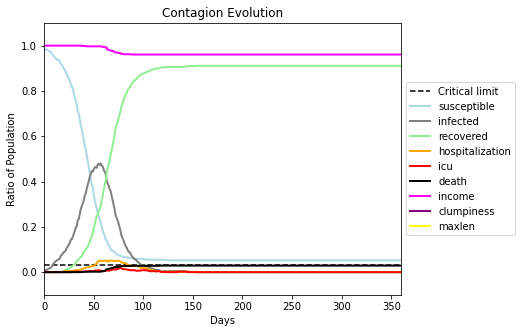

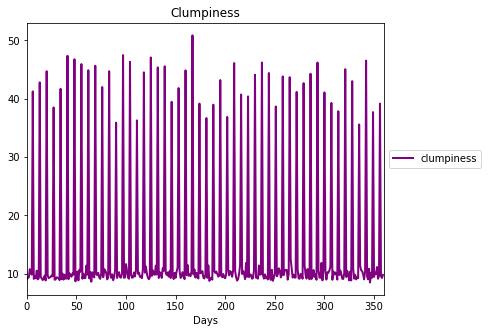

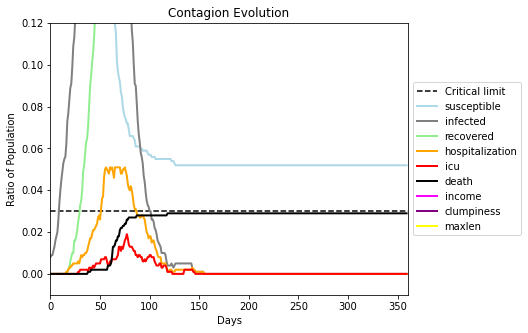

In [17]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.97
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T-.97", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )


Save these seeds if you want to rerun a scenario
[4155]
Average similarity between family members is 0.05497944860667243 at temperature 1
Average similarity between family and home is 0.9998924650233709 at temperature -1
Average similarity between students and their classroom is 0.10002266665983457 at temperature 1
Average classroom occupancy is 13.25 and number classrooms is 24
Average similarity between workers is 0.05424527365378129 at temperature 1
Average office occupancy is 9.651515151515152 and number offices is 66
Average friend similarity for adults: 0.10737002995722313 for kids: 0.11368059890977189
home_districts
[
Home (0,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocated in this district.
, 
Home (1,0) district with 1 Buildings
HomogeneousBuilding: 20 units (each with capacity for 5 people.) 0 allocated units with a total of 0 people.
Total of 0 people allocate

avg restaurant similarity 0.059854784078866734
disconnects
0.0
clumpiness 8.89
maxlen 13
avg restaurant similarity 0.07188403264429787
disconnects
0.0
clumpiness 8.4
maxlen 14
avg restaurant similarity 0.04757496240462032
disconnects
0.0
clumpiness 9.0
maxlen 15
avg restaurant similarity 0.038369152116347165
disconnects
0.0
clumpiness 8.73
maxlen 14
avg restaurant similarity 0.12605735573560778
disconnects
0.0
clumpiness 9.11
maxlen 13
avg restaurant similarity 0.014421395788085887
disconnects
0.0
clumpiness 8.2
maxlen 13
avg restaurant similarity 0.060460268071921244
disconnects
0.44
clumpiness 41.75
maxlen 19
avg restaurant similarity 0.051502998473902356
disconnects
0.0
clumpiness 8.5
maxlen 13
avg restaurant similarity 0.09938011868907999
disconnects
0.0
clumpiness 8.8
maxlen 13
avg restaurant similarity 0.09740657716396052
disconnects
0.0
clumpiness 8.52
maxlen 14
avg restaurant similarity 0.03453853315329569
disconnects
0.0
clumpiness 8.36
maxlen 14
avg restaurant similarity 0.03

disconnects
0.0
clumpiness 8.78
maxlen 13
avg restaurant similarity 0.02225298819347569
disconnects
0.0
clumpiness 8.99
maxlen 14
avg restaurant similarity 0.005432209562582683
disconnects
0.0
clumpiness 8.96
maxlen 13
avg restaurant similarity 0.049528849032345716
disconnects
0.0
clumpiness 8.89
maxlen 13
avg restaurant similarity 0.058611096188963305
disconnects
0.0
clumpiness 9.09
maxlen 14
avg restaurant similarity 0.07245047011018171
disconnects
0.4
clumpiness 39.21
maxlen 19
avg restaurant similarity 0.054930493463287204
disconnects
0.0
clumpiness 8.92
maxlen 14
avg restaurant similarity 0.08192068700749063
disconnects
0.0
clumpiness 8.7
maxlen 14
avg restaurant similarity 0.05318371161875011
disconnects
0.0
clumpiness 8.81
maxlen 13
avg restaurant similarity 0.04709942114387457
disconnects
0.0
clumpiness 9.06
maxlen 14
avg restaurant similarity 0.12906333586005897
disconnects
0.0
clumpiness 8.69
maxlen 13
avg restaurant similarity 0.07214517315064452
disconnects
0.0
clumpiness 8

disconnects
0.01
clumpiness 9.62
maxlen 15
avg restaurant similarity 0.04972429427369772
disconnects
0.02
clumpiness 10.37
maxlen 14
avg restaurant similarity 0.0815549709148869
disconnects
0.0
clumpiness 8.8
maxlen 14
avg restaurant similarity 0.022836930017291854
disconnects
0.0
clumpiness 8.58
maxlen 13
avg restaurant similarity 0.07568506736945979
disconnects
0.34
clumpiness 34.32
maxlen 18
avg restaurant similarity 0.127077265187038
disconnects
0.0
clumpiness 8.83
maxlen 13
avg restaurant similarity 0.040109663313146734
disconnects
0.0
clumpiness 9.18
maxlen 14
avg restaurant similarity 0.08509042600954167
disconnects
0.0
clumpiness 8.82
maxlen 14
avg restaurant similarity 0.07987810003515619
disconnects
0.0
clumpiness 8.91
maxlen 13
avg restaurant similarity -0.006527651465059184
disconnects
0.01
clumpiness 9.55
maxlen 13
avg restaurant similarity 0.06350865297705956
disconnects
0.02
clumpiness 10.35
maxlen 13
avg restaurant similarity 0.004852873123015689
disconnects
0.43
clumpi

disconnects
0.0
clumpiness 8.87
maxlen 14
avg restaurant similarity 0.05392665992666951
disconnects
0.0
clumpiness 9.01
maxlen 13
avg restaurant similarity 0.04554555519177597
disconnects
0.0
clumpiness 8.86
maxlen 14
avg restaurant similarity 0.06059381039916027
disconnects
0.39
clumpiness 38.28
maxlen 20
avg restaurant similarity 0.061051018218573734
disconnects
0.0
clumpiness 8.87
maxlen 15
avg restaurant similarity 0.06852322529860286
disconnects
0.01
clumpiness 9.53
maxlen 14
avg restaurant similarity 0.11339848347994934
disconnects
0.02
clumpiness 10.4
maxlen 13
avg restaurant similarity 0.0007492989725304934
disconnects
0.01
clumpiness 9.58
maxlen 13
avg restaurant similarity 0.01924244366366175
disconnects
0.02
clumpiness 10.24
maxlen 13
avg restaurant similarity 0.05022289641551898
disconnects
0.02
clumpiness 10.33
maxlen 14
avg restaurant similarity 0.0871888749311017
disconnects
0.34
clumpiness 34.63
maxlen 18
avg restaurant similarity 0.05802191468317532
disconnects
0.02
cl

(<function dict.items>, <function dict.items>, <function dict.items>)

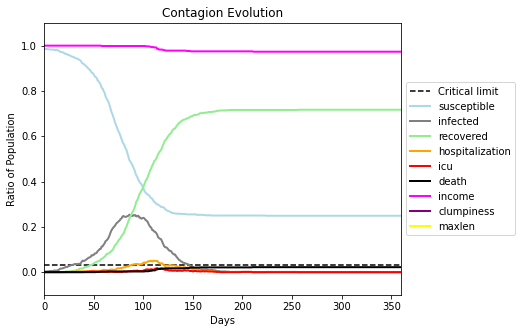

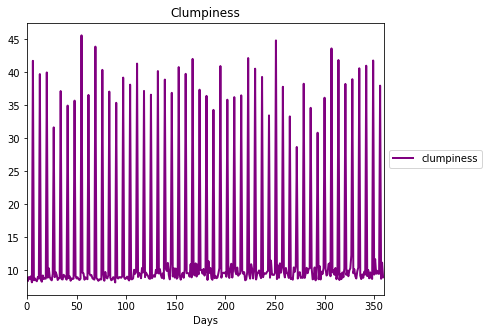

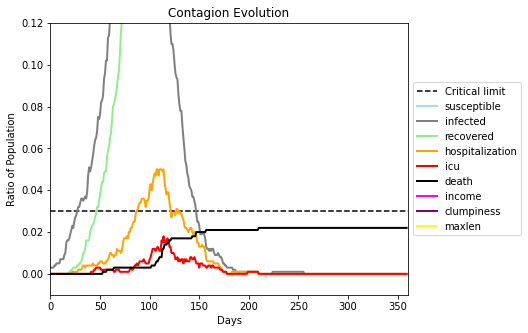

In [18]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 20
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs= 1,fname = run_prefix+"T1", 
              do_print = True, 
              home_grid_height = 8, home_grid_width = 10, school_home_list = 

[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9)],
[
(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9)],
[
(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9)],
[
(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)]
]

,work_home_list =     
[
[
(0,0),(0,1),(0,2),(0,3),(0,4),
(0,5),(0,6),(0,7),(0,8),(0,9),
(1,0),(1,1),(1,2),(1,3),(1,4),
(1,5),(1,6),(1,7),(1,8),(1,9),

(2,0),(2,1),(2,2),(2,3),(2,4),
(2,5),(2,6),(2,7),(2,8),(2,9),
(3,0),(3,1),(3,2),(3,3),(3,4),
(3,5),(3,6),(3,7),(3,8),(3,9),


(4,0),(4,1),(4,2),(4,3),(4,4),
(4,5),(4,6),(4,7),(4,8),(4,9),
(5,0),(5,1),(5,2),(5,3),(5,4),
(5,5),(5,6),(5,7),(5,8),(5,9),

(6,0),(6,1),(6,2),(6,3),(6,4),
(6,5),(6,6),(6,7),(6,8),(6,9),
(7,0),(7,1),(7,2),(7,3),(7,4),
(7,5),(7,6),(7,7),(7,8),(7,9)
]

],listeners = listeners, compute_hoprank = True )
